# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**:

1. Определить рыночную стоимость объектов недвижимости, выявив востребованный ценовой сегмент;
2. Отследить существующие аномалии для:
    - Улучшения качества данных;
    - Использованиях их в качестве параметров для автоматизированной системы поиска аномалий и подозрительной активности;
3. Выявить влияние характеристик недвижимости на её ценообразование.

**Ход исследования**:

В первую очередь мы выполним общий обзор предоставленного нам датасета с данными об объявлениях по Ленинградской области: `/datasets/real_estate_data.csv`.

---

После этого мы выполним предобработку данных с учётом того, чтобы данные оставались в консистентном состоянии и были пригодны для дальнейшего исследования. В ходе предобработки мы:
- Оценим структуру столбцов: названия столбцов, типы данных. В случае необходимости внесём изменения;
- Выявим пропуски в данных, определим возможные причины их появления и возможные действия по отношению к ним;
- Найдём аномалии, определим возможные действия по отношению к ним;
- Определим явные и неявные дубликаты в данных и устраним их.

---

Также, в целях исследования могут быть добавлены новые столбцы, которые помогут нам в анализе.

---

Непосредственно исследовательский анализ будет состоять из следующих этапов:
1. Выполним обзор каждой из характеристик недвижимости в виде "Характеристика/число объявлений" и опишем наши наблюдения по отношению к каждой характеристике;
2. Определим, как быстро продаются квартиры и сделаем вывод о том, что считать быстрой/медленной продажей;
3. Изучим степень влияния характеристик недвижимости на формирование её цены;
4. Посчитаем среднюю цену одного квадратного метра недвижимости;
5. Рассмотрим изменение цены недвижимости в развисимости от расстояния до центра города.

---

Сделаем заключительный вывод, где опишем рекомендации по отношению к технической части датасета, а также рекомендации для бизнеса на основе нашего исследования.

### Откройте файл с данными и изучите общую информацию. 

In [2]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
#from pymystem3 import Mystem
#m = Mystem()

Путь к файлу из описания задачи: `/datasets/real_estate_data.csv`

In [3]:
# Сохраним таблицу в переменную "df"
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Проверим общую информацию о таблице:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведем на экран 20 первых строк таблицы, чтобы дополнительно визуально оценить данные.

In [5]:
# Выведем первые 20 строк таблицы "df"
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Построим общую гистрограмму для всех числовых столбцов таблицы.

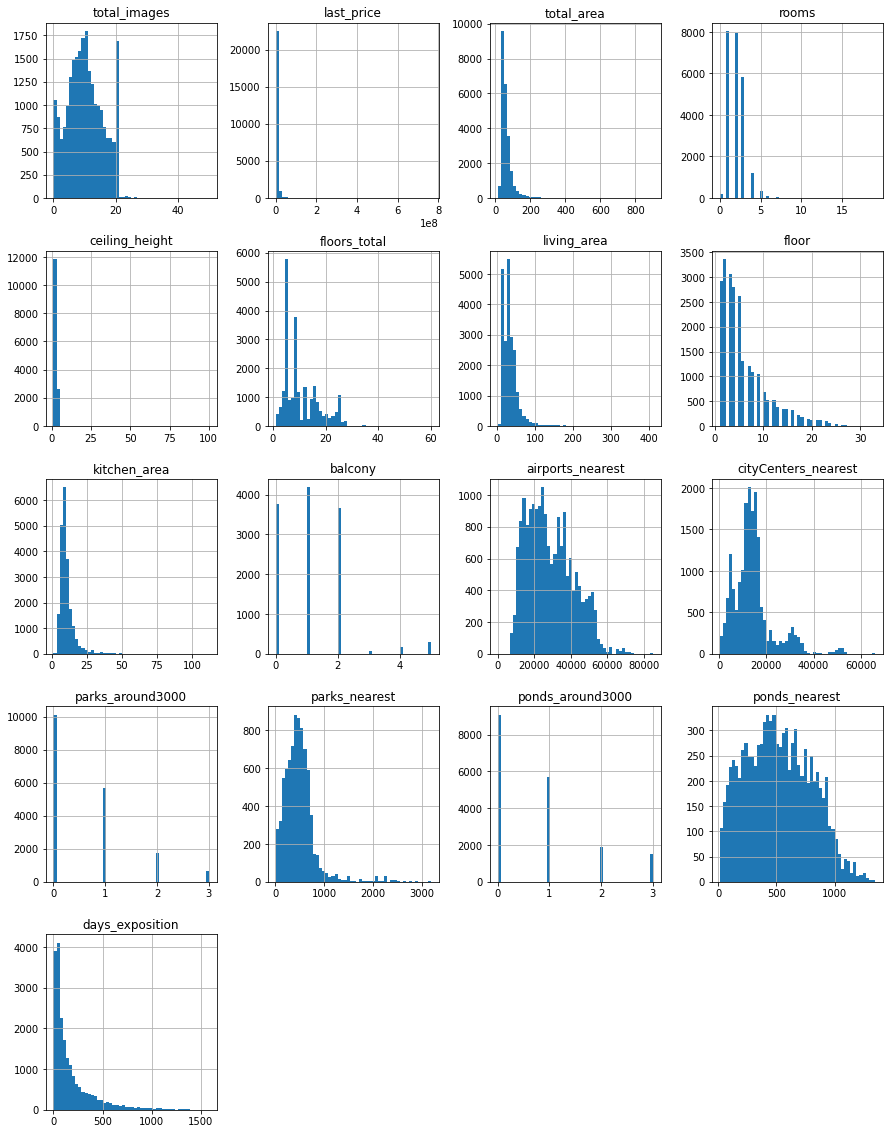

In [6]:
# Используем метод "hist"
df.hist(bins=50, figsize=(15, 20))
plt.show()

### Предобработка данных

Что мы можем извлечь из результата работы `df.info()`, вывода первых 20 строк и построения гистограмм :
- Имена колонок в некоторых случаях можно доработать для более явного понимания их назначения или лаконичного описания;
- Всего в таблице 23699 строк, и достаточно большое количество колонок содержит в себе NaN-значения;
- Для ряда полей следует изменить тип на более подходящий;
- Гистограммы для имеющихся характеристик дают примерное представление об их структуре и наполнении. Детально к рассмотрению диаграмм мы вернёмся на этапе исследовательского анализа данных.

#### Переименование столбцов

Переименуем следующие столбцы:
- *first_day_exposition* -> **exposition_date** | в данном случае словосочетания first_day и exposition практически являлись синонимами друг другу;
- *rooms* -> **rooms_quantity** | более явное указание на то, что речь именно о ***количестве*** комнат;
- *studio* -> **is_studio** | так как здесь предполагается булев тип поля, то это следует обозначить более чётко;
- *open_plan* -> **is_open_plan** | так как здесь предполагается булев тип поля, то это следует обозначить более чётко;
- *balcony* -> **balcony_quantity** | более явное указание на то, что речь именно о ***количестве*** балконов;
- *cityCenters_nearest* -> **city_centers_nearest** | используем в работе "***snake_case***" вместо "solid_case";
- *parks_around3000* -> **parks_around_3000** | "3000" - хоть и не слово, но всё же составная часть названия поля. Кроме того, можно учитывать возможно привязки дальнейших расчётов по названию поля, а к числу в нём проще привязываться, если перед числом будет разделитель;
- *ponds_around3000* -> **ponds_around_3000** | "3000" - хоть и не слово, но всё же составная часть названия поля. Кроме того, можно учитывать возможно привязки дальнейших расчётов по названию поля, а к числу в нём проще привязываться, если перед числом будет разделитель.

In [7]:
# Переименовываем столбцы методом "rename"
df = df.rename(columns={'first_day_exposition': 'exposition_date', 'rooms': 'rooms_quantity', 
                   'studio': 'is_studio', 'open_plan': 'is_open_plan', 
                   'balcony': 'balcony_quantity', 'cityCenters_nearest': 'city_centers_nearest', 
                   'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000', })

# Выводим на экран получившийся результат
df.columns

Index(['total_images', 'last_price', 'total_area', 'exposition_date',
       'rooms_quantity', 'ceiling_height', 'floors_total', 'living_area',
       'floor', 'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area',
       'balcony_quantity', 'locality_name', 'airports_nearest',
       'city_centers_nearest', 'parks_around_3000', 'parks_nearest',
       'ponds_around_3000', 'ponds_nearest', 'days_exposition'],
      dtype='object')

##### Вывод

Было изменено наименование 9 столбцов. В целом можно выделить следующий ряд причин, по которым исходные названия можно считать неоптимальными:

- Название столбца плохо передавало смысл содержимого этого столбца или его функцию:
    - first_day_exposition;
    - rooms;
    - studio;
    - open_plan;
    - balcony;
- Название столбца не передавало не вписывалось в семантику:
    - cityCenters_nearest;
    - parks_around3000;
    - parks_around3000.

Более конкретные причины по каждому столбцу описаны в п. 2.1.

#### Работа с пропусками и исправление данных

Выведем отдельно список колонок, в которых имеются пропуски:

In [8]:
df_nan_count = df.isna().sum()
df_nan_count[df_nan_count > 0]

ceiling_height           9195
floors_total               86
living_area              1903
is_apartment            20924
kitchen_area             2278
balcony_quantity        11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Также можем увидеть процент NaN-значений от общего числа записей в таблице.

In [9]:
pd.DataFrame(round(df.isna().mean()*100,)).reset_index().rename(columns={'index': 'column_name', 0: 'nan_percent'})\
.sort_values(by='nan_percent', ascending=False).style.background_gradient('coolwarm')

,column_name,nan_percent
9,is_apartment,88.000000
18,parks_nearest,66.000000
20,ponds_nearest,62.000000
13,balcony_quantity,49.000000
5,ceiling_height,39.000000
19,ponds_around_3000,23.000000
17,parks_around_3000,23.000000
16,city_centers_nearest,23.000000
15,airports_nearest,23.000000
21,days_exposition,13.000000


Выходит так, что б**о**льшая часть всех столбцов содержат в себе NaN-значения. Причём, это откосится как к данным, добавляемых вручную пользователями, так и к картографическим. Чтобы понять, как действовать в случае каждого из столбцов нам потребуется проаналазировать каждый из них и принять решение. Возможные решения:
- Удалить строки с пропусками;
- Заполнить пропуски значениями;
- Оставить пропуски без изменений.

Что касается типов данных, по результату работы `df.info()` видно, что есть, например, поле `floors_total` с типом `float64`. Учитывая, что количество этажей может быть только целым числом, текущий тип данных для него избыточен.

Учитывая, что в таблице 22 столбца, в JupyterHub не все смогли отобразиться в выводе в п.1. А именно, остались скрыты столбцы `is_studio` и `is_open_plan`. Но мы уже знаем и видим, что эти поля имеют тип `bool`, поэтому никаких неожиданностей, связанных с соответствием данных типу данных столбца ожидать здесь не стоит.

Рассмотрим остальные столбцы, их данные и определим те, где можно рассмотреть возможность изменения типа данных.

- **last_price**: 
    - Поле имеет тип `float64`, и как видно, в таблице для последней цены отображается один знак после запятой. По первым 20 записям можно сделать вывод о том, что цен с дробной частью нет, а даже если такие и есть в датасете, вполне можно привести значения этого столбца к целым значениям. Учитывая объём данных и величину самих значений, это в любом случае ни исказит результаты дальнейшего анализа.
- **exposition_date**:
    - Поле имеет тип `object`. Следует перевести его в более читаемый вид, и соответственно, изменить тип данных;
- **floors_total**:
    - Поле имеет тип `float64`, что избыточно. Значений этажей с дробной частью не бывает, поэтому изменим тип данных.
- **is_apartment**:
    - Поле имеет тип `object`, что не соответствует назначению этого поля как булевому.
- **balcony_quantity**:
    - Поле имеет тип `float64`, что избыточно. Не может быть полтора или два с половиной балкона, поэтому изменим тип данных.
- **airports_nearest**, **city_centers_nearest**, **parks_around_3000**, **parks_nearest**, **ponds_around_3000**, **ponds_nearest**:
    - Поле имеет тип `float64`, что избыточно. Даже если в таблице могут присутствовать значения с дробной частью метров в полях с расстоянием до определённых точек, в текущем исследовании это не будет иметь влияние на выводы.
- **days_exposition**
    - Поле имеет тип `float64`, что избыточно. Число дней, как видно, исчисляется целыми значениями, поэтому приведём поле в соответствующий тип.

Рассмотрим каждый столбец по порядку:

##### ceiling_height
—  высота потолков (м).

###### Анализ возможных действий с пропусками

Выведем количество пропусков по столбцу `ceiling_height`:

In [10]:
print('Всего пропусков в "ceiling_height":', df['ceiling_height'].isna().sum())

Всего пропусков в "ceiling_height": 9195


Известно, что пропуски по данному столбцу присутствуют в 9195 из 23699 записей. Как минимум, По этой причине вариант с удалением строк с такими пропусками точно не следует рассматривать, потому что это исказит весь датасет и сделает его непригодным к дальнейшему анализу. Оставлять пропуски без изменений также не следует. Хоть в задании к проекту и не требуется рассматривать влияние этой характеристик на цену, но всё жнэто такая характеристика, которая присуща любой квартире, и она может сыграть свою роль в дальнейшем.

Значит, единственный подходящий нам вариант - заполнить пропуски значениями. Осталось определить, какими именно. Самый очевидный и, вероятно, подходящий вариант - определить среднее или медианное значение, и заполнить пропуски ими.

Рассмотрим допустимость использования среднего значния. Для этого построим график "ящик с усами" для `ceiling_height`, и таким образом определим, есть ли у нас выбросы в данных. Если обнаружим такие, то использование среднего значения для заполнения пропусков, возможно, будет не очень уместно.

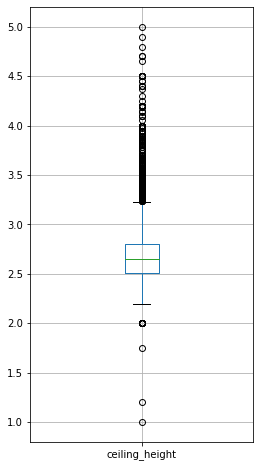

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [11]:
# Строим график "Ящик с усами" по колонке "ceiling_height"
# Ограничиваем выборку по ceiling_height <= 5, чтобы межквартильный размах не сузился до одной линии, а выбросы было видно чётче
df[df['ceiling_height'] <= 5].boxplot(column='ceiling_height', figsize=(4, 8))

# Отображаем график на экране
plt.show()

# Выводим на экран числовое описание данных для "ceiling_height"
df['ceiling_height'].describe()

Как видно из графика и числового описания, выбросы действительно есть. А минимальная и максимальная высоты потолков и вовсе 1 метр и 100 метров соответственно. Причём, выбросов в сторону высоких значений высот потолков явно больше, поэтому оно влияет на среднее значение, и как следствие, на стандартное отклонение.

Выходит, что:

- Медианное значение: 2.65м
- Среднее значение: 2,77м

Вполне можно было бы выбрать медианное значение, тем более, что оно вполне соответствует типичной высоте потолков в действительности. Но так как данные всё равно следует привести в порядок и избавиться от аномалий, сначала выполним эту задачу, а после вернёмся к выбору между медианным и средним значением.

Если опираться на документ "*СНиП 31-01-2003 Здания жилые многоквартирные*", то видимо, что установленная минимальная высота потолков для жилых помещений - 2.5м и 2.7м в зависимости от региона. Максимальная высота документом не регулируется.

[Ссылка на СНиП](https://47.mchs.gov.ru/deyatelnost/stranicy-s-glavnoy/zakonodatelstvo/normativno-pravovye-dokumenty-po-pozharnoy-bezopasnosti/snip-31-01-2003-zdaniya-zhilye-mnogokvartirnye#:~:text=%D0%BC%D0%B5%D0%BD%D0%B5%D0%B5%2016%20%D0%BC.-,5.8,-%D0%92%D1%8B%D1%81%D0%BE%D1%82%D0%B0%20(%D0%BE%D1%82%20%D0%BF%D0%BE%D0%BB%D0%B0)

По ссылке из источника ниже также находим подтверждение тому, что нормы максимальной высоты потолка не существует, но на рынке недвижимости сформировались определённое деление в зависимости от класса жилья, в среднем по приципу "дороже - выше". То есть, почти наверняка жильё Эконом-класса не будет иметь потолки высотой 3 метра и более.

[Ссылка на информацио о современных стандартах высоты потолков](https://gorodzakon.ru/standart-vysoty-potolkov/#:~:text=%D0%B1%D0%BE%D0%B3%D0%B0%D1%82%D0%BE%D0%B5%20%D1%80%D0%B0%D0%B7%D0%BD%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%B8%D0%B5%20%D0%BF%D0%BE%D1%82%D0%BE%D0%BB%D0%BA%D0%BE%D0%B2.-,%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80%D0%BD%D1%8B%D0%B5%20%D0%B4%D0%BE%D0%BC%D0%B0,-%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%20%D0%B2%202%2C5)


![Изображение таблицы](https://sun9-22.userapi.com/impg/tTcHWomy6PcQQT7JK7uk6C73g2aDjyQHoL8IXQ/r8EbuYDnJXA.jpg?size=914x172&quality=96&sign=2eab73893e5d2ee6feda65131da23c8f&type=album)

###### Работа с аномалиями

Попробуем вывести первую двадатку самых часто встречающихся высот потолка в объявлениях, чтобы подтвердить или может даже опровергнуть то, что указанные высоты потолков - это условный стандарт.

In [12]:
# Создаём переменную "ceiling_height_top_20" и записываем в неё топ-20 высок потолка с количеством объявлений по каждой
ceiling_height_top_20 = df['ceiling_height'].value_counts().reset_index().head(20)

# Переименовываем столбцы
ceiling_height_top_20 = ceiling_height_top_20.rename(columns={'index': 'ceiling_height', 'ceiling_height': 'offers_count'})

# Отображаем топ-20 с сортировкой по высоте потолков
ceiling_height_top_20.sort_values(by='ceiling_height')

,ceiling_height,offers_count
0,2.50,3515
19,2.52,79
17,2.54,83
5,2.55,980
12,2.56,139
14,2.57,103
1,2.60,1646
18,2.64,81
7,2.65,676
2,2.70,1574


По таблице выше можем сделать вывод о том, что пределы высот потолков действительно входят в отрезок от 2.5м до 3.5м. Если и имеют место быть случаи, когда есть отклонения на самом деле, то это должны быть крайне редкие ситуации.

В таком случае можно считать, что все высоты потолков в объявлениях, выходящие за эти пределы - это ошибки при вводе информации пользователями. Верхнюю границу установим с небольшим запасом, равную 3.6м. Найдём все такие значения.

In [13]:
# Создаём и сохраняем в переменную "all_ceiling_height" все высоты потолков
all_ceiling_height = df['ceiling_height'].value_counts().reset_index()

# Выводим на экран все значения по заданному условию
display('Все высоты потолков, выходящие за пределы [2.5 : 3.6]м', 
        all_ceiling_height[(all_ceiling_height['index'] < 2.5) | (all_ceiling_height['index'] > 3.6)]['index'].unique())

'Все высоты потолков, выходящие за пределы [2.5 : 3.6]м'

array([  4.  ,   3.7 ,   2.4 ,   3.8 ,   2.45,   3.9 ,   2.  ,   4.2 ,
         2.48,   3.95,   3.75,  27.  ,  25.  ,   4.5 ,   3.65,   2.3 ,
         4.4 ,   8.  ,   3.66,   2.47,   3.63,   3.67,   3.78,   4.1 ,
         3.86,  32.  ,   3.62,   4.7 ,   4.19,   2.46,   5.3 ,   3.85,
         4.45,   3.69,   3.83,   2.34,   1.  ,   4.37,   3.98,   5.6 ,
         4.15,   5.8 ,   1.2 ,  20.  ,   6.  ,   4.06,   3.68,   1.75,
         5.  ,   4.8 ,  27.5 ,   5.5 ,   4.14, 100.  ,   3.87,   3.82,
         2.2 ,   4.3 ,  26.  ,   2.49,   3.84,   5.2 ,   4.9 ,   3.76,
        22.6 ,  14.  ,   2.25,   3.88,  24.  ,   8.3 ,   4.25,   3.93,
        10.3 ,   4.65])

Получилось достаточно много. Теперь определим вероятные причины подобных значений в объявлениях:

- Просчёты в измерениях авторов объявлений;
- Ошибочное занесение результата другой величины в поле, предназначенное для высоты потолка;
- "Халатность" автора объявления в части заполнения информации;
- Ошибка в расположении знака-разделителя дробной и целой части числа.

Для первых трёх причин можно скорректировать данные, основываясь на среднем или медианном значении. Предпочтительнее второе, так как именно из-за них же среднее значение и оказалось искажено в большую сторону.

Для четвёртой причины возможен другой подход. Мы можем исправить значения, вписав их такими, какими, предположительно, задумывались авторами объявлений. Но это будет касаться только объявлений с высотой потолков от "25 до 36 метров". Потому как, например, для значения 22.6 вряд ли задумывалось 2.26, по причине выхода за стандартные пределы.

Сперва заменим значения указанных выше высот. Для этого найдём конкретные значения в пределах от 25 до 36.

In [14]:
# Создаём и сохраняем в переменную "all_ceiling_height" все высоты потолков в пределах от 25 до 36.
mistake_dec_ceiling_height = all_ceiling_height[(all_ceiling_height['index'] >= 25) 
                                                & (all_ceiling_height['index'] <= 36)]['index'].unique()

# Выводим на экране все значения по заданным услоиям
display('Высоты потолков от 25 метров до 36 метров', 
        mistake_dec_ceiling_height)

'Высоты потолков от 25 метров до 36 метров'

array([27. , 25. , 32. , 27.5, 26. ])

Теперь исправим их, разделив каждое из значений на 10.

In [15]:
# Делим на 10 все значения по заданному условию
df.loc[(df['ceiling_height'] >= 25) & (df['ceiling_height'] <= 36), 'ceiling_height'] /= 10

# Убеждаемся, что вывод строк по условию не выдаст ни одной записи.
df.loc[(df['ceiling_height'] >= 25) & (df['ceiling_height'] <= 36)]

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Высоты потолков с ошибкой разделителя дробной части исправили.

Теперь для оставшихся ошибочных значений зададим медианное значение высоты потолка.

In [16]:
# Задаём медианное значение по столбцу
df.loc[(df['ceiling_height'] < 2.5) | (df['ceiling_height'] > 3.6), 'ceiling_height'] = df['ceiling_height'].median()

# Убеждаемся, что вывод строк по условию не выдаст ни одной записи.
df.loc[(df['ceiling_height'] < 2.5) | (df['ceiling_height'] > 3.6)]

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Все аномальные значения исправлены. Проверим, какие уникальные значения высоты потолка остались.

In [17]:
df['ceiling_height'].value_counts().reset_index()['index'].unique()

array([2.5 , 2.6 , 2.7 , 3.  , 2.8 , 2.55, 2.65, 2.75, 3.2 , 3.1 , 2.9 ,
       3.3 , 2.56, 3.5 , 2.57, 2.85, 3.4 , 2.54, 2.64, 2.52, 2.53, 2.58,
       2.77, 2.76, 3.15, 2.78, 2.95, 3.05, 3.6 , 2.67, 3.25, 2.73, 2.51,
       2.72, 2.74, 2.68, 2.84, 3.55, 2.82, 3.12, 2.66, 3.35, 2.83, 2.62,
       3.08, 2.59, 2.71, 2.63, 2.88, 3.07, 3.18, 3.06, 3.13, 2.87, 3.33,
       2.79, 3.45, 2.81, 2.92, 3.02, 3.38, 3.11, 3.16, 3.14, 3.04, 3.32,
       3.26, 2.86, 3.54, 3.27, 3.01, 3.47, 3.28, 3.17, 3.56, 2.61, 3.36,
       2.96, 2.91, 3.23, 3.24, 2.93, 3.09, 3.03, 3.37, 3.46, 2.97, 3.34,
       3.52, 3.57, 3.53, 3.22, 3.31, 2.94, 3.21, 3.49, 2.69, 3.51, 2.98,
       3.29, 2.99, 3.44, 3.59, 3.48, 3.58, 3.43, 3.42, 2.89, 3.39])

Остались лишь значения высоты от 2.5 до 3.6 метров, как и ожидалось. Проверим, как это повлияло на выбросы, а также среднее значение и стандартное отклонение.

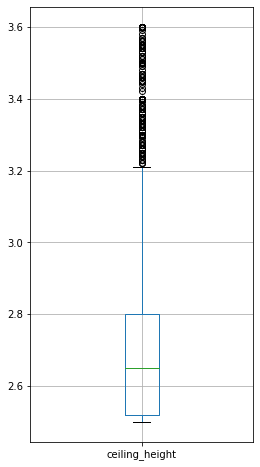

count    14504.000000
mean         2.709767
std          0.229004
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          3.600000
Name: ceiling_height, dtype: float64

In [18]:
# Строим график "Ящик с усами" по колонке "ceiling_height"
df[df['ceiling_height'] <= 100].boxplot(column='ceiling_height', figsize=(4, 8))

# Отображаем график на экране
plt.show()

# Выводим на экран числовое описание данных для "ceiling_height"
df['ceiling_height'].describe()

Результат вполне устраивает, так как среднее значение высоты снизилось до 2.7, что действительно является очень распространённой, типичной высотой потолка в квартирах. А также, стандартное отклонение снизилось до 0.23, что на целую единицу меньше, чем при наличии аномальных значений.

Значит, теперь мы можем заменить все пропуски на среднее значение высоты.

###### Исправление пропусков

Теперь мы можем заменить все пропуски на среднее значение высоты.

In [19]:
# Заполняем пропуски средним значением высоты потолка, с огруглением до 1 знака после запятой
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean().round(1))

# Выводим количество NaN-значений и изменения числового описания данных 
print('Количество NaN-значений:', df['ceiling_height'].isna().sum())
df['ceiling_height'].describe()

Количество NaN-значений: 0


count    23699.000000
mean         2.705977
std          0.179213
min          2.500000
25%          2.600000
50%          2.700000
75%          2.700000
max          3.600000
Name: ceiling_height, dtype: float64

###### Возможные причины пропусков и аномалий

**Возможные причины пропусков**:

- Поле "*высота потолка*" не является обязательным для заполнения автором объявления;
- Ошибка при формировании датасета.

**Возможные причины аномалий**:

- Опечатки при заполнении поля;
- Ошибки на этапе измерения высоты потолка.

##### floors_total

— всего этажей в доме.

###### Анализ возможных действий с пропусками

Выведем количество пропусков по столбцу `floors_total`:

In [20]:
print('Всего пропусков во "floors_total":', df['floors_total'].isna().sum())

Всего пропусков во "floors_total": 86


Теперь рассмотрим поле `floors_total`. Это поле содержит всего 86 NaN-значений. Выведем 50 строк и попробуем понять понять, может ли это быть связано с тем, что дома действительно одноэтажные, или же это просто ошибка при заполнении данных. Понять мы это сможем, по крайней мере, по полю `floor`.

In [21]:
df.query('floors_total.isna()').head(50)

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,2.70,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,2.70,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,2.70,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,2.70,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,2.70,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13T00:00:00,2,2.70,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29T00:00:00,2,2.70,NaN,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21T00:00:00,1,2.70,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23T00:00:00,1,2.70,NaN,22.20,6,NaN,...,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,2.70,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Как видно, почти во всех случаях, из выведенных на экран, поле `floor` заполнено, в то время как `floors_total` - нет. Учитывая, что в исследовании необходимо оценить влияние на цену расположением этажа, на котором расположена квартира (относительно того, первый он, последний или другой), а также, учитывая, что доля таких объявлений крайне мала от общего количества, можно сделать вывод, что этими строками можно пренебречь.

###### Работа с аномалиями

Единственные аномалии, которые можно представить для поля `floors_total` - это чрезмерно завышенное количество этажей, 0 этажей или отрицательное количество этажей.

Проверим, какие варианты значений существуют в датасете:

In [22]:
df['floors_total'].value_counts().reset_index().rename(
    columns={'floors_total': 'count', 'index': 'floors_total'}).sort_values(by='floors_total', ascending=False)

,floors_total,count
33,60.0,1
35,52.0,1
30,37.0,1
29,36.0,3
27,35.0,24
31,34.0,1
32,33.0,1
34,29.0,1
28,28.0,21
23,27.0,164


Явных проблем с данными здесь не видно. Единственное, что можно проверить на всякий случай - это строки, где количество этажей 52 и 60. Потому как, например, если эти небоскрёбы расположены в каком-нибудь селе, это явно будет ошибкой.

In [23]:
df[df['floors_total'] >= 52]

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,...,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Выходит, что имеем по одному очень высотному зданию.

- Кронштадт - 1 дом, 60 этажей;
- Санкт-Петербург - 1 дом, 52 этажа.

Количество этажей явно нетипичное для России. Если для Санкт-Петербурга ещё можно допустить наличие таких зданий, то для Кронштадта - вряд ли. Проверим наверняка по внешнему источнику.

- [Этажность домов в Кронштадте](https://domreestr.ru/sankt-peterburg/kronshtadt/)
- [Этажность домов в Санкт-Петербурге](https://domreestr.ru/sankt-peterburg/)


Видим такую картину, что самый высокий дом в Кронштадте имеет 15 этаже. А самый высокий дом в Санкт-Петербурге - 36 этажей. Учитывая, что данные на этих страницах актуальны, судя по указанным годам, можем сделать вывод, что указанные значения этажности ошибочны.

Удалим эти две строки, чтобы они не искажали данные датасета.

In [24]:
df = df[df['floors_total'] < 52].reset_index(drop=True)

###### Исправление пропусков

Поэтому в данном случае просто удалим все указанные 86 строк.

In [25]:
# Удаляем NaN-значения из столбца "floors_total"
df = df.dropna(subset=['floors_total'])

# Проверяем отсутствие NaN-значений
df['floors_total'].isna().sum()

0

###### Возможные причины пропусков и аномалий

**Возможные причины пропусков**:

- Поле "*количество этажей*" не является обязательным для заполнения автором объявления;
- Ошибка при формировании датасета.

**Возможные причины аномалий**:

- Опечатки при заполнении поля "количество этажей";
- Менее вероятно - в объявлении неверно указан город.

###### Изменение типа данных

Теперь, когда избавились от пропусков, можно изменить тип данных столбца на более подходящий - `int64`. Поле имеет тип `float64`, что избыточно. Значений этажей с дробной частью не бывает.

In [26]:
# Изменяем тип столбца методом "astype"
df['floors_total'] = df['floors_total'].astype('int')

# Проверяем новый тип данных методом dtypes
df['floors_total'].dtypes

dtype('int64')

##### living_area и kitchen_area

— жилая площадь в квадратных метрах (м²);

— площадь кухни в квадратных метрах (м²).

###### Анализ возможных действий с пропусками

Начнём со столбца `living_area`, и выведем количество пропусков по столбцу:

In [27]:
print('Всего пропусков в "living_area":', df['living_area'].isna().sum())

Всего пропусков в "living_area": 1870


В данном случае строк с незаполненным значением жилой площали 1903, что достаточно существенно, по сравнению с предыдущим полем. Посмотрим также на эти строки:

In [28]:
df.query('living_area.isna()').head(10)

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.7,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.7,24,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.7,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.7,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.7,13,NaN,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000.0,35.0,2018-01-01T00:00:00,1,2.7,12,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.7,10,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.0,80.5,2018-01-15T00:00:00,3,2.7,25,NaN,16,NaN,...,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
116,18,10999000.0,97.2,2017-11-13T00:00:00,3,2.5,16,NaN,16,NaN,...,18.3,5.0,Санкт-Петербург,19426.0,21138.0,0.0,NaN,2.0,390.0,394.0


Всего за площадь у нас отвечают 3 столбца. Поле `total_area` (общая площадь квартиры) заполнено всегда. Можно выделить следующие возможные вариации:

- Поле `living_area` не заполнено, а `kitcher_area` заполнено;
- Поле `living_area` не заполнено и `kitchen_area` тоже.

В первом случае мы можем попробовать определить значение для `living_area`, основываясь на значениях для двух других известных столбцов. Во втором случае качественно заполнить пропуск не получится. В то же время, по заданию требуется определить в том числе влияние жилой площади на цену. Поэтому от строк с такими значениями следует избавиться. Но для начала попробуем разобраться с первым кейсом.

В первую очередь приходит мысль о том, что `total_area` ≈ `living_area` + `kitchen_area`. Проверим это на практике. Сложим два правых поля, и разделим их на значение поля `total_area`. Если результатом будет "1" или близкое к нему значение, то будем считать гипотезу верной. И в этом случае можно будет посчитать значение `living_area` = `total_area` - `kitchen_area`.

In [29]:
# Складываем площади указанных полей и делим на общую площадь
((df['living_area'] + df['kitchen_area']) / df['total_area']).head(15)

0     0.703704
1     0.732673
2     0.760714
3          NaN
4     0.730000
5     0.773026
6     0.670241
7          NaN
8     0.731001
9     0.821311
10    0.727273
11    0.840909
12    0.722222
13    0.752336
14    0.694444
dtype: float64

Гипотеза не подтвердилась. Вероятно, за счёт того, что площадь ванной комнаты, балконов, коридоров и других подобных частей квартиры не относятся к жилым помещениям. Значит, мы не можем просто заполнить пропуски значениями площади по формуле, описанной выше.

Тем не менее, по результату можно видеть, что соотношение суммы жилой площади и площади кухни к общей площади будто бы имеет похожие значения. Возможно, стандартное отклонение здесь достаточно низкое, и можно будет заполнить пропуски, основываясь на этом.

In [30]:
# Выводим числовое описание
((df['living_area'] + df['kitchen_area']) / df['total_area']).describe()

count    20941.000000
mean         0.749585
std          0.071782
min          0.136691
25%          0.710843
50%          0.750000
75%          0.786765
max          1.575758
dtype: float64

Как видим, стандартное отклонение очень низкое, а среднее и медианное значение крайне близки друг к другу. Также, по максимальному значению мы попутно увидели, что есть случаи, когда сумма значений жилой и кухонной площадей больше, чем общая площадь. Это явная аномалия и ошибка, так как общая площадь **не может быть меньше** суммы площадей указанных выше помещений, тем более, с учётом того, что в жилая площадь итак не включает в себя ванную комнату, балконы и т.д.

###### Работа с аномалиями

Перед тем, как заполнять пропуски, определим, сколько аномальных значений. Предположим, что кто-то из авторов объявлений считает жилой площадью всё, что не кухня. Поэтому посчитаем количество строк, где `df['living_area'] + df['kitchen_area']) / df['total_area']` будет больше, чем единица. То есть, где сумма жилой площади и площади кухни больше, чем общая площадь, чего быть не может.

In [31]:
# Находим количество строк методом "count()"
print('Количество записей с ошибками в площади:',
      df[(df['living_area'] + df['kitchen_area']) / df['total_area'] > 1]['total_area'].count())

Количество записей с ошибками в площади: 64


Выходит, что имеем всего 64 строки с ошибочными значениями площадей. Так как количество таких строк несущественно на фоне всего датасета, а также, учитывая, что мы не можем определить, в какой именно из площадей допущена ошибка, следует просто удалить такие строки.

In [32]:
# Сохраняем в переменную df выборку, отфильтрованную по условию, где отношение суммы площадей к общей площади <= 1
# А также те строки, где у нас есть пропуски, чтобы не потерять их
df = df[((df['living_area'] + df['kitchen_area']) / df['total_area'] <= 1) | (df['living_area'].isna())].reset_index(drop=True)

# Выводим количество ошибочных записей, убеждаемся, что их теперь ноль
print('Количество записей с ошибками в площади:',
      df[(df['living_area'] + df['kitchen_area']) / df['total_area'] > 1]['total_area'].count())

# Выводим новое числовое описание
((df['living_area'] + df['kitchen_area']) / df['total_area']).describe()

Количество записей с ошибками в площади: 0


count    20877.000000
mean         0.748371
std          0.068089
min          0.136691
25%          0.710723
50%          0.750000
75%          0.786260
max          1.000000
dtype: float64

Существенных отличий в разнице медианном и среднем значениях не произошло, ошибочные записи удалены.

Проверим также числовое описание для рассматриваемых площадей:

In [33]:
print('Числовое описание площади кухни')
display(df['kitchen_area'].describe())

print('Числовое описание жилой площади')
df['living_area'].describe()

Числовое описание площади кухни


count    21316.000000
mean        10.552218
std          5.891841
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Числовое описание жилой площади


count    20877.000000
mean        34.624134
std         21.939497
min          2.000000
25%         18.800000
50%         30.000000
75%         42.500000
max        409.700000
Name: living_area, dtype: float64

В первую очередь в глаза бросается то, что есть строки, где минимальные площади составляют 1,3м<sup>2</sup> и 2м<sup>2</sup>, что явно не может быть в действительности. Посмотрим на строки с низким значением площадей. Возьмём за минимально допустимую площадь 6м<sup>2</sup>. Выведем 2 результата: с сортировкой по обоим полям по очереди.

In [34]:
print('Общее количество строк с низкой площадью:', df[(df['kitchen_area'] < 6) | (df['living_area'] < 6)]\
['last_price'].count())

display(df[(df['kitchen_area'] < 6) | (df['living_area'] < 6)]\
[['last_price', 'total_area', 'rooms_quantity', 'is_studio', 'living_area', 'kitchen_area']]\
.sort_values(by='living_area').head(15))

df[(df['kitchen_area'] < 6) | (df['living_area'] < 6)]\
[['last_price', 'total_area', 'rooms_quantity', 'is_studio', 'living_area', 'kitchen_area']]\
.sort_values(by='kitchen_area').head(15)

Общее количество строк с низкой площадью: 1703


,last_price,total_area,rooms_quantity,is_studio,living_area,kitchen_area
13361,6350000.0,52.0,2,False,2.0,9.0
3119,4440000.0,41.0,1,False,3.0,11.0
22630,64990000.0,139.0,3,False,3.0,16.0
21060,6100000.0,77.6,4,False,5.4,9.8
4284,3250000.0,23.5,1,False,10.9,5.8
18861,1190000.0,14.0,1,False,11.0,2.0
2367,1750000.0,21.1,1,False,11.4,5.2
11996,3000000.0,21.9,1,False,11.4,5.3
15250,2500000.0,22.0,1,False,11.5,5.3
7201,2550000.0,23.0,1,False,12.0,5.0


,last_price,total_area,rooms_quantity,is_studio,living_area,kitchen_area
19408,4250000.0,28.50,1,False,19.5,1.30
10590,5350000.0,32.00,1,False,16.0,2.00
20558,1870000.0,20.00,1,False,14.0,2.00
8791,2920000.0,23.29,1,False,21.0,2.00
18861,1190000.0,14.00,1,False,11.0,2.00
876,2600000.0,27.00,1,False,18.0,2.00
6019,3100000.0,24.00,2,False,16.0,2.00
15732,2720000.0,25.70,1,False,22.6,2.00
17136,2940000.0,34.70,1,False,15.5,2.30
8402,2200000.0,18.40,1,False,14.0,2.40


Всего 1701 строка с низкой площадью.

Результат по полю `living_area` вполне нагляден. Явно ошибочными являются 5 записей, где жилая площадь меньше 6м<sup>2</sup>, и в то же время общая площадь существенно больше, как и цены за недвижимость. Последующие записи начинаются уже с 10,9м<sup>2</sup>, что хоть и мало, но уже более реалистично. Особенно с учётом низких величин значений `total_area` в этих строках.

Решение: удалить 5 строк, где `living_area` < 6м<sup>2</sup>.

Результат по полю `kitchen_area` менее однозначен. Здесь нет явных выбросов. Кроме того, получается, что из 1701 строки целых 1696 относятся к условию `kitchen_area` < 6м<sup>2</sup>, что может указывать на то, что вероятная какая-то объективная причина, почему авторы объявлений действительно не ошибаются, указывая такое значение. Возможно, это квартиры, где кухня объединена с гостиной, и площадь кухни указывается как фактическая область в помещении с кухонной зоной.

Решение: оставить поле `kitchen_area` без изменений на текущем этапе. И посмотрим, как это повлияет на дальнейший анализ.

In [35]:
print('Количество строк до удаления аномалий:', df['last_price'].count())

df = df[df['living_area'] >=6]

print('Количество строк до удаления аномалий:', df['last_price'].count())

Количество строк до удаления аномалий: 22747
Количество строк до удаления аномалий: 20873


Проверим также и строки с очень высокими значениями:

In [36]:
display(df.sort_values(by='living_area', ascending=False).head(15)\
        [['last_price', 'total_area', 'rooms_quantity', 'is_studio', 'living_area', 'kitchen_area']])

df.sort_values(by='kitchen_area', ascending=False).head(15)\
[['last_price', 'total_area', 'rooms_quantity', 'is_studio', 'living_area', 'kitchen_area']]

,last_price,total_area,rooms_quantity,is_studio,living_area,kitchen_area
18762,420000000.0,900.0,12,False,409.7,112.0
5147,65000000.0,590.0,15,False,409.0,100.0
11899,91500000.0,495.0,7,False,347.5,25.0
4070,50000000.0,517.0,7,False,332.0,22.0
12340,140000000.0,631.2,7,False,322.3,19.5
639,49950000.0,483.9,7,False,312.5,26.4
7707,84000000.0,507.0,5,False,301.5,45.5
13527,51000000.0,402.0,6,False,300.0,56.0
19460,20000000.0,460.8,6,False,279.6,55.5
21590,91075000.0,491.0,5,False,274.0,45.0


,last_price,total_area,rooms_quantity,is_studio,living_area,kitchen_area
18762,420000000.0,900.0,12,False,409.7,112.0
19406,85000000.0,249.7,3,False,72.0,107.0
2393,12500000.0,255.0,3,False,153.9,100.7
5147,65000000.0,590.0,15,False,409.0,100.0
15607,82400000.0,181.1,3,False,58.2,93.2
16145,65850000.0,146.0,2,False,40.0,93.0
10434,56844500.0,177.9,3,False,87.2,87.2
476,95000000.0,216.0,4,False,86.0,77.0
4217,57000000.0,174.0,3,False,95.0,77.0
14061,47000000.0,150.0,4,False,58.0,75.0


В случае с очень большими площадами видим, что всё это очень дорогие квартиры с большим количеством комнат и большой общей площадью. Поэтому данные значения не считаем аномалией.

Теперь можно приступить к исправлению пропусков.

###### Исправление пропусков

Заполнять пропуски будем на основании среднего/медианного значения, равного **0.75**. В нашем случае это означает, что сумма площадей кухни и жилых помещений - это 75% от общей площади квартиры. Значит, можем вывести следующую формулу:

***living_area = 0.75 * total_area - kitchen_area***

Зафиксируем сначала строки, на примере которых будем проверять результат изменений.

In [37]:
# Выведем строку и учтём, что проверить будет нужно именно по индексу этой строки
print('Строка для проверки заполнения пропуска:')
display(df[(df['living_area'].isna()) & (df['kitchen_area'].isna() == False)].head(1))

print('Строка для проверки отсутствия лишних изменений:')
df.head(1)

Строка для проверки заполнения пропуска:


,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Строка для проверки отсутствия лишних изменений:


,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


Теперь выполним заполнение пропусков по указанной ранее формуле.

In [38]:
# Выполняем заполнение пропусков c учётом того, что поле "kitchen_area тоже не должно быть пустым"
df.loc[(df['living_area'].isna()) 
       & (df['kitchen_area'].isna() == False), 'living_area'] = round(0.75 * df['total_area'] - df['kitchen_area'], 1)

print('Строка для проверки заполнения пропуска:')
display(df[df.index == 7])

print('Строка для проверки отсутствия лишних изменений:')
display(df.head(1))

Строка для проверки заполнения пропуска:


,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Строка для проверки отсутствия лишних изменений:


,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


Теперь проверим, остались ли в поле `living_area` пропуски.

In [39]:
df[df['living_area'].isna()]

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Из 1903 пропусков осталось 1431. Как видно, это произошло из-за того, что у нас есть ситуации, когда и поле `kitchen_area`, и поле `living_area` имели пропуски в одной строке. Ранее, при заполнении пропусков мы как раз фильтровались по условию, чтобы вычисление проводилось только в строках, где `kitchen_area` не NaN.

Перед тем, как приступать к работе с пропусками в `kitchen_area`, заранее проверим датасет на количество строк с пропусками в обоих столбцах. Сколько бы ни было таких строк, наиболее оптимальным вариантом будет их удаление, потому что, как уже отмачали ранее, эти данные нужны для расчётов влияния площадей помещений на цену.

In [40]:
df[(df['living_area'].isna()) & (df['kitchen_area'].isna())]['total_area'].count()

0

Оказалось, что все 1431 оставшихся пропусков в `living_area` - это строки, где пропуски содержатся в обоих полях.

Получается, что у нас нет особого выбора, и в текущих условиях лучше пожертвовать примерно 5-6% всего датасета, чем иметь строки с пропущенными значениями в этих полях. Причём, по выводу таблицы выше сложно понять, почему эти поля могли быть не заполнены. Единственный наиболее вероятный вариант - авторы объявлений просто решили не заполнять эти поля.

In [41]:
df = df[(df['living_area'].isna() == False) & (df['kitchen_area'].isna() == False)]

print('Общее количество строк в living_area:', df['living_area'].count())
print('Количество пропусков в living_area:', df['living_area'].isna().sum())
print('')
print('Общее количество строк в kitchen_area:', df['kitchen_area'].count())
print('Количество пропусков в kitchen_area:', df['kitchen_area'].isna().sum())

Общее количество строк в living_area: 20873
Количество пропусков в living_area: 0

Общее количество строк в kitchen_area: 20873
Количество пропусков в kitchen_area: 0


###### Возможные причины пропусков и аномалий

**Возможные причины пропусков**:

- Поля "*площадь кухни*" и "*жилая площадь*" не являются обязательными для заполнения автором объявления;
- Ошибка при формировании датасета.

**Возможные причины аномалий**:

- Опечатки или ошибки расчётов при заполнении полей;
- Авторы объявлений могли перепутать поля.

##### is_apartment

— апартаменты (булев тип).

###### Анализ возможных действий с пропусками

Выведем количество пропусков по столбцу `is_apartment`:

In [42]:
print('Всего пропусков в "is_apartment":', df['is_apartment'].isna().sum())

Всего пропусков в "is_apartment": 18353


Подавляющее большинство строк содержат пропуски по данному столбцу. В целом, это можно рассматривать как эквивалент `False`, так как чаще всего отсутствие заполнения поля с булевым типом предполагает именно "отрицательный" вариант.

Но сначала выведем 5 строк таблицы, где `is_apartment == True`, и попробуем понять по остальным полям, могут ли быть какие-то признаки того, что это апартаменты.

In [43]:
df[df['is_apartment'] == True].head()

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1070,1,34878556.0,95.8,2014-12-09T00:00:00,2,2.70,6,58.30,5,True,...,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
2862,9,4931398.0,42.9,2018-07-23T00:00:00,1,3.15,4,20.39,3,True,...,10.29,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
2948,13,6600000.0,95.0,2018-09-08T00:00:00,2,2.65,7,45.00,7,True,...,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3665,4,4779000.0,53.1,2016-05-16T00:00:00,1,2.70,13,19.80,6,True,...,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3793,10,4300000.0,50.0,2019-04-20T00:00:00,1,3.00,11,17.00,9,True,...,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN


Явных признаков апартаментов нет, кроме самого поля `is_apartment`. Поэтому в данном случае можем заменить все пропуски значениями `False`.

###### Работа с аномалиями

Аномалий в данном столбце не ожидается, так как этот столбец предполагается булевым.

###### Исправление пропусков

Заполним пропуски значениями `False`:

In [44]:
df.loc[df['is_apartment'].isna(), 'is_apartment'] = False

print(df['is_apartment'].isna().sum())

df['is_apartment'].value_counts()

0


False    20840
True        33
Name: is_apartment, dtype: int64

###### Возможные причины пропусков и аномалий

**Возможные причины пропусков**:

- При заполнении объявления автор может просто не выбрать для поля "Апартаменты" значение. В базу данных это попадает как пропуск, но по факту в подавляющем большинстве случаев это можно приравнять к тому, что данное помещение - это не апартаменты;
- Ошибка при формировании датасета;
- Возможно, есть факторы, от которых зависит, в каком виде попадёт значение этого поля в базу данных.

###### Изменение типа данных

На текущий момент поле имеет тип `Object`:

In [45]:
df['is_apartment'].dtypes

dtype('O')

Заменим тип на `Bool`, так как в `Object` может быть записано практически что угодно.
`Boolean` в данном случае не очень подходит, т.к. он допускает наличие NaN-значений.

In [46]:
# Изменяем тип столбца методом "astype"
df['is_apartment'] = df['is_apartment'].astype('bool')

# Проверяем новый тип данных методом dtypes
df['is_apartment'].dtypes

dtype('bool')

##### balcony_quantity

— число балконов

###### Анализ возможных действий с пропусками

Выведем количество пропусков по столбцу `balcony_quantity`, а также все имеющиеся уникальные значения по даннному столбцу:

In [47]:
print('Всего пропусков в "balcony_quantity":', df['balcony_quantity'].isna().sum(), '\n')

print(df['balcony_quantity'].value_counts())

df

Всего пропусков в "balcony_quantity": 9726 

1.0    3958
0.0    3341
2.0    3326
5.0     277
4.0     173
3.0      72
Name: balcony_quantity, dtype: int64


,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.70,11,18.6,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5,34.3,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.70,12,14.4,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22741,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.70,5,17.5,4,False,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
22742,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9,40.0,8,False,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
22743,9,9700000.0,133.81,2017-03-21T00:00:00,3,2.65,5,73.3,3,False,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
22744,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.70,5,38.0,4,False,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Самым оптимальным вариантом здесь будет заполнение пропусков значениями "0", так как здесь работает логика: "Если автор не заполнил поле с количеством балконов, вероятнее всего, они отсутствуют".

###### Работа с аномалиями

В результатах выделяются результаты с 3, 4 и 5 балконами. Таких объявлений существенно меньше, а сам факт наличия настолько большого количества балконов, особенно в количестве 5, может вызывать сомнения. Посмотрим на строки с большим количеством балконов.

In [48]:
display(df[df['balcony_quantity'] == 5].head(3))
display(df[df['balcony_quantity'] == 4].head(3))
display(df[df['balcony_quantity'] == 3].head(3))

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.70,14,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4,80.9,2,False,...,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
258,2,14700000.0,120.0,2018-09-07T00:00:00,3,2.75,20,63.0,18,False,...,16.0,5.0,Санкт-Петербург,39204.0,10430.0,2.0,627.0,3.0,77.0,61.0


,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
121,20,33000000.0,180.0,2017-02-17T00:00:00,3,2.90,9,86.0,8,False,...,24.0,4.0,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0
241,13,3200000.0,51.7,2019-01-22T00:00:00,2,2.65,16,29.2,5,False,...,7.7,4.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,21.0
254,12,39900000.0,140.6,2016-11-19T00:00:00,2,3.50,8,39.8,7,False,...,49.2,4.0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,NaN


,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
507,10,3800000.0,74.4,2017-05-18T00:00:00,3,2.7,5,44.4,3,False,...,8.9,3.0,Кингисепп,NaN,NaN,NaN,NaN,NaN,NaN,45.0
741,0,5100000.0,81.0,2018-02-01T00:00:00,3,2.8,12,48.3,1,False,...,14.0,3.0,посёлок Шушары,18542.0,29006.0,0.0,NaN,0.0,NaN,378.0
837,9,13000000.0,132.0,2018-02-07T00:00:00,4,3.2,4,88.0,3,False,...,13.0,3.0,Санкт-Петербург,38287.0,11850.0,1.0,147.0,1.0,379.0,143.0


Как видно, квартиры с такими объявлениями часто имеют высокую цену и большую общую площадь. Как минимум, выглядит правдоподобно.

Дополнительным подтверждением того, что квартиры со столь большим количеством балконов существуют, можно взять, например, из статьи:
[Статья про квартиры с большим количеством балконов](https://dzen.ru/a/YaNJ0CWzJEHP-DbU).

Значит, в данном случае это можно не считать аномалиями, и соответственно, никаких действий здесь не требуется.

###### Исправление пропусков

Как было сказано ранее, в п. 2.2.5.1., мы приняли решение заполнить пропуски значениями "0". Выполним заполнение:

In [49]:
df.loc[df['balcony_quantity'].isna(), 'balcony_quantity'] = 0

print('Количество пропусков в balcony_quantity:', df['balcony_quantity'].isna().sum(), '\n')

df['balcony_quantity'].value_counts()

Количество пропусков в balcony_quantity: 0 



0.0    13067
1.0     3958
2.0     3326
5.0      277
4.0      173
3.0       72
Name: balcony_quantity, dtype: int64

###### Возможные причины пропусков и аномалий

**Возможные причины пропусков**:

- Поле "Количество балконов" не являлось обязательным для заполнения;
- Ошибка при формировании датасета;
- На сегодняшний день в объявлениях сервиса "Недвижимость" отсутствует возможность фильтрации по этому полю. Возможно, в какой-то момент возможность указания числа балконов исчезла.

###### Изменение типа данных

Как уже отметили в п. 2.2., тип данных `float64` избыточен для этого поля. Поэтому переведём его в `int64`.

In [50]:
# Изменяем тип столбца методом "astype"
df['balcony_quantity'] = df['balcony_quantity'].astype('int')

# Проверяем новый тип данных методом dtypes
df['balcony_quantity'].dtypes

dtype('int64')

##### locality_name

— название населённого пункта.

###### Анализ возможных действий с пропусками

Выведем количество пропусков по столбцу `locality_name`:

In [51]:
print('Всего пропусков в "locality_name":', df['locality_name'].isna().sum())

Всего пропусков в "locality_name": 38


Посмотрим на строки, где отсутствует название населённого пункта:

In [52]:
df[df['locality_name'].isna()]

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1058,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5,50.80,2,False,...,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
1955,6,5398000.0,80.00,2017-05-30T00:00:00,3,2.70,4,42.60,2,False,...,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2503,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.70,24,15.60,3,False,...,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2531,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.70,24,33.10,21,False,...,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3438,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.70,5,30.80,5,False,...,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
3987,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8,39.62,7,False,...,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4022,7,9200000.0,80.00,2015-12-10T00:00:00,3,2.65,4,52.30,3,False,...,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
5133,19,13540000.0,85.50,2016-01-20T00:00:00,3,2.70,7,59.10,5,False,...,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
6497,20,4895892.0,60.70,2015-03-12T00:00:00,2,2.70,24,31.90,3,False,...,12.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,468.0
6835,5,4250000.0,56.00,2016-03-16T00:00:00,3,2.70,5,40.00,4,False,...,6.00,0,NaN,14031.0,8582.0,0.0,NaN,0.0,NaN,96.0


Визуально эти строки не имеют каких-либо выраженных особенностей. Учитывая их небольшое количество, а также, отсутствие возможности определить правильное значение города, есть три варианта возможных действий:

- Оставить пропуски;
- Удалить строки с пропусками;
- Задать определённое значение для этого поля в таких строках.

Первый вариант не очень хорош тем, что NaN-значения в этом поле могут вводить путаницу при анализе и построении графиков. Второй вариант допустим, но всё же здесь видны объявления с достаточно выдающимися значениями цен и количеством изображений, что может внести свой вклад в исследование. Поэтому пойдём третьим путём - заполним пропуски значениями "*Неизвестно*". При дальнейшем анализе мы будем иметь ввиду, что у нас будет своего рода отдельная категория.

###### Исправление пропусков

Заполняем пропуски:

In [53]:
df.loc[df['locality_name'].isna(), 'locality_name'] = 'Неизвестно'

###### Работа с аномалиями

Посмотрим дополнительно на этот столбец в части аномалий. Для этого выведем все его имеющиеся значения и посмотрим на них:

In [54]:
print('Количество уникальных значений населённых пунктов: ', df['locality_name'].nunique())

df['locality_name'].unique()

Количество уникальных значений населённых пунктов:  346


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

Как видно, всего в датасете имеется 346 населённых пунктов (+ "Неизвестно"). Но в то же время здесь имеются разные вариации написания. В частности, на примере посёлка "*Кузьмоловский*" можем видеть, что в датасете фигурирует один и тот же посёлок с разным написанием:

- пос**е**лок городского типа Кузьмоловский;
- пос**ё**лок городского типа Кузьмоловский.

То есть, в данном случае у нас не столько аномалия, сколько неопределённое число неявных дублей. Искать во всех 346 строках неявные дубликаты в ручном режиме будет неэффективно. Поэтому напишем набор функций, которые выполнят два основных действия:
- Исправление значений столбца `locality_name`, оставив в нём непосредственно названия населённых пунктов;
- Создание нового столбца `locality_type` (тип населённого пункта) с последующим заполнением.

In [55]:
'''
Функция "get_locality()".
Предназначена для определения названия поселения и его типа.
На вход принимается строка, например "Посёлок городского типа Рябово".
На выходе тип поселения определится как "посёлок", а название как "Рябово".

В таблице "df" поле "locality_name" перезапишется значением названия поселения.
Новое поле "locality_type" примет значения типа поселения.

Общий алгоритм действий:
1. Значение населённого пункта из строки столбца 'locality_name' разбивается на список v_splitted_name, с делением по пробелу;
2. В переменную v_splitted_name записывается тип населённого пункта на основании ключевых слов в списке;
3. Функция возвращает название населённого пункта через вызов get_clean_locality_name() и тип населённого пункта.

'''
def get_locality(initial_name):
    v_splitted_name = initial_name.split(' ')
    #print(v_splitted_name)
    if 'посёлок' in v_splitted_name or 'поселок' in v_splitted_name or 'товарищество' in v_splitted_name or 'село' in v_splitted_name:
        v_locality_type = 'посёлок'
    elif 'деревня' in v_splitted_name:
        v_locality_type = 'деревня'
    elif 'Неизвестно' in v_splitted_name:
        v_locality_type = 'другое'
    else:
        v_locality_type = 'город'
    return get_clean_locality_name(v_splitted_name), v_locality_type


'''
Функция get_clean_locality_name().
Вспомогательная функция для "get_locality()".
Предназначена для получения "чистого" названия населённого пункта, без дополнений в виде "городской посёлок", "деревня" и т.д.

Общий алгоритм действий:
1. Создаётся пустая строковая переменная v_locality_name;
2. Заполняется переменная v_locality_name через вызов цикла. Цикл необходим, т.к. некоторые населённые пункты могут состоять
из нескольких слов. Также, в зависимости от позиции слова, в конце может добавиться или не добавиться пробел;
3. Функция возвращает "чистое" название населённого пункта.

'''
def get_clean_locality_name(list_name):
    v_locality_name = ''
    for index in range(len(list_name)):
        if list_name[index][0].isupper() and list_name[index] != list_name[-1]:
            v_locality_name += list_name[index] + ' '
        elif list_name[index][0].isupper() and list_name[index] == list_name[-1]:
            v_locality_name += list_name[index]
        elif list_name[index][0].isdigit() and '-й' in list_name[index]:
            v_locality_name += list_name[index] + ' '
        elif list_name[index] == 'километр' or list_name[index] == 'км':
            v_locality_name += list_name[index]
    return v_locality_name

'''
Функция set_new_locality_values(row).
Предназначена для корректировки названий населённых пунктов и заполнения нового столбца "locality_type".

Общий алгоритм действий:
1. В переменные v_locality_name и v_locality_type записываются значения названия и типа населённого пункта
через вызов функции get_locality();
2. Функция возвращает ранее записанные переменные в виде объекта "Series" для того, чтобы последующий вызов метода "apply"
смог обработать возвращаемые значения.

'''
def set_new_locality_values(row):
    v_locality_name = get_locality(row['locality_name'])[0]
    v_locality_type = get_locality(row['locality_name'])[1]
    return pd.Series([v_locality_name, v_locality_type])

После того, как мы создали весь необходимый набор функций, теперь можем через вызов метода `apply` к таблице `df` выполнить необходимые нам изменения.

Также, предусмотрим, чтобы функция не запускалась во второй раз, если однажды она уже выполнялась. Маркером того, что она выполнялась, может послужить создаваемый в ней столбец `locality_type`. На факт его существования и завяжем проверку.

In [56]:
if 'locality_type' not in df.columns:
    df[['locality_name', 'locality_type']] = df.apply(set_new_locality_values, axis=1)
else:
    print('Функция уже выполнялась. Повторно она выполнена не будет')

# Выведем первые 15 строк столбцов "locality_name" и "locality_type"
display(df[['locality_name', 'locality_type']].head(15))

,locality_name,locality_type
0,Санкт-Петербург,город
1,Шушары,посёлок
2,Санкт-Петербург,город
4,Санкт-Петербург,город
5,Янино-1,посёлок
6,Парголово,посёлок
8,Мурино,посёлок
9,Санкт-Петербург,город
10,Санкт-Петербург,город
11,Ломоносов,город


Судя по результату, у нас действительно удалось разделить название и тип населённых пунктов. А значит, самое время вновь проверить количество и список уникальных значений населённых пунктов. Напомним, что перед исправлением их было 346, и там присутствовали неявные дубли. Посмотрим, получилось ли у нас от них избавиться.

In [57]:
print('Количество уникальных значений населённых пунктов: ', df['locality_name'].nunique())

# Отображаем уникальные значения населённых пунктов
display(df['locality_name'].unique())

Количество уникальных значений населённых пунктов:  287


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Колпино', 'Гатчина', 'Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'Новое Девяткино', 'Металлострой', 'Лебяжье',
       'Сиверский', 'Молодцово', 'Кузьмоловский', 'Новая Ропша',
       'Павловск', 'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный', 'Старая',
       'Лесколово', 'Путилово', 'Ивангород', 'Сланцы', 'Шлиссельбург',
       'Сясьстрой', 'Никольское', 'Зеленогорск', 'Сосновый Бор',
       'Новый Свет', 'Оржицы', 'Кальтино', 'Романовка', 'Бугры', 'Рощино',
       'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Павлово', 'Оредеж',
       'Красный Бор', 'Коммунар', 'Молодёжное', 'Нурма', 'Синявино',
       'Тосно', 'Стрельна', 'Бокситогорск', 'Александровская',
       'Лопухинка', 'Терволово', 'Советский'

Результат: 288 строк после исправлений против 346 строк до исправлений. 

Выходит что целых **58** населённых пунктов имели дубли в датасете. Учитывая их большое количество и результат, автоматизация поиска и исправления дублей через функцию была оптимальным решением.

И наконец, проверим значения нового поля `locality_type`:

In [58]:
# Отображаем уникальные значения населённых пунктов и количество объявлений по ним
df['locality_type'].value_counts()

город      17736
посёлок     2296
деревня      803
другое        38
Name: locality_type, dtype: int64

###### Возможные причины пропусков и аномалий

**Возможные причины пропусков**:

- Поле "*населённый пункт*" не является обязательным для заполнения автором объявления (маловероятно);
- Ошибка при формировании датасета;
- Ошибка в работе сервиса при заполнении таблицы в базе данных.

**Возможные причины аномалий**:

- Неявные дубли могли появиться, потому что пользователю позволяется вручную вводить название города;
- Есть также вероятность того, что словарь в базе данных, на основании которого автор объявления выбирает населённый пункт, сам по себе имеет дубли.

##### airports_nearest

— расстояние до ближайшего аэропорта в метрах (м).

###### Анализ возможных действий с пропусками

В случае с данным столбцом пропуски вполне допустимы и могут объясняться отсутствием в конкретном населённом пункте аэропорта. Учитывая, что данная характеристика картографическая, а не заполняемая пользователем, она должна быть сформирована в любом случае. Но всё же можно допустить, что могут быть некорректные пропуски присутствуют в датасете. Если таковые есть, то это будут пропуски в строках для тех населённых пунктов, в которых на самом деле аэропорт присутствует.

Попробуем найти такие кейсы. В дальнейшем аналогичную проверку потребуется сделать ещё несколько раз, поэтому напишем функцию.

In [59]:
def check_nan_mapping(p_column_name, p_display=True, p_delete_nan=False):
    # Находим строки, где в поле "airports_nearest" есть пропуски и выводим 5 строк на экран
    nan = df[df[p_column_name].isna()][['locality_type', 'locality_name']].value_counts().reset_index().rename(
    columns={0: 'count_nan'})
    if p_display == True:
        display(nan.head())

    # Находим строки, где в поле "airports_nearest" нет пропусков и выводим 5 строк на экран
    not_nan = df[df[p_column_name].isna() == False][['locality_type', 'locality_name']]\
    .value_counts().reset_index().rename(
        columns={0: 'count_not_nan'})
    if p_display == True:
        display(not_nan.head())

    # Соединяем полученные таблицы по значениям полей "locality_type" и "locality_name"
    merged = nan.merge(not_nan, on=['locality_type', 'locality_name'])
    if p_display == True:
        display(merged)
        
    # Если на вход к параметру p_delete_nan отправили значение True, выполняем удаление пропусков для всех причастных городов
    if p_delete_nan == True:
        for locality in merged['locality_name']:
            df.drop(index=df[(df['locality_name'] == locality) & (df[p_column_name].isna())].index, inplace=True)

Функция готова, теперь вызовем её, отправив на вход поле `airports_nearest`.

In [60]:
check_nan_mapping('airports_nearest')

,locality_type,locality_name,count_nan
0,посёлок,Мурино,427
1,город,Всеволожск,354
2,город,Гатчина,286
3,деревня,Кудрово,226
4,город,Выборг,190


,locality_type,locality_name,count_not_nan
0,город,Санкт-Петербург,13928
1,посёлок,Шушары,390
2,город,Пушкин,337
3,город,Колпино,320
4,посёлок,Парголово,287


,locality_type,locality_name,count_nan,count_not_nan
0,город,Санкт-Петербург,65,13928
1,другое,Неизвестно,6,32
2,город,Красное Село,2,162
3,город,Колпино,1,320
4,посёлок,Шушары,1,390
5,город,Ломоносов,1,123
6,город,Кронштадт,1,87


Проверка была сделана не зря. Видим, что у нас есть 7 населённых пунктов, объявления в рамках которых содержат некорректные пропуски. Например, в Санкт-Петербурге для 14 201 объявления указано расстояние до аэропорта, но по какой-то причине в **67** объявлениях эта информация отсутствует.

Учитывая крайне малую долю таких некорректных пропусков, мы можем без риска существенно исказить данные, удалить строки с пропущенными значениями в текущем столбце. То же самое касается `locality_name` = "*Неизвестно*", так как данные там всё равно останутся, но при этом, в дальнейшем анализе мы вряд ли будем сильно опираться на эту категорию.

###### Исправление пропусков

Для того, чтобы удалить строки с пропусками, выполним ту же самую функцию, но с параметром `p_delete_nan=True`:

In [61]:
check_nan_mapping('airports_nearest', p_display=False, p_delete_nan=True)

# Делаем ресет индексов
df = df.reset_index(drop=True)

Проверим наличие некорректных пропусков ещё раз:

In [62]:
# Заново формируем таблицы на основе новых данных после удалений
check_nan_mapping('airports_nearest', p_display=True)

,locality_type,locality_name,count_nan
0,посёлок,Мурино,427
1,город,Всеволожск,354
2,город,Гатчина,286
3,деревня,Кудрово,226
4,город,Выборг,190


,locality_type,locality_name,count_not_nan
0,город,Санкт-Петербург,13928
1,посёлок,Шушары,390
2,город,Пушкин,337
3,город,Колпино,320
4,посёлок,Парголово,287


,locality_type,locality_name,count_nan,count_not_nan


Теперь мы убедились, что избавились от некорректных пропусков.

###### Работа с аномалиями

Аномалии в данных здесь могут быть представлены в виде слишком больших или слишком маленьких расстояний до аэропорта. Например, если встретим в данных значение "0", то это явно можно будет считать ошибкой. ~~Если, конечно, это не один японский аэропорт, где почти на самой взлётной полосе живёт старик в своём частном доме, из которого отказался выселяться во время постройки аэропорта.~~

Посмотрим распределение значений в виде числового описания:

In [63]:
df['airports_nearest'].describe()

count    16222.000000
mean     28778.350142
std      12644.324912
min          0.000000
25%      18539.000000
50%      26691.500000
75%      37199.750000
max      84869.000000
Name: airports_nearest, dtype: float64

~~Похоже, в наши данные всё же затесался тот самый японский аэропорт.~~

Видим, что у нас всё-таки есть объявления с крайними значениями. Обратим в первую очередь внимание на те случаи, где расстояние до ближайшего аэропорта - 0 метров. А также, выведем список расстояние до аэропорта с сортировкой по возрастанию.

In [64]:
display(df[df['airports_nearest'] == 0])

df['airports_nearest'].sort_values()

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
18514,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9,19.8,3,False,...,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,город


18514       0.0
3531     6450.0
11342    6450.0
6835     6914.0
20309    6949.0
          ...  
20781       NaN
20782       NaN
20791       NaN
20794       NaN
20795       NaN
Name: airports_nearest, Length: 20796, dtype: float64

Как оказалось, такое объявление всего одно. Следующие же за ним уже имеют значения в 6,5 км и больше, что вполне реалистично.
Учитывая, что эта характеристика не является ключевой в дальнейшем исследовательском анализе (одной из ключевых всё же предполагается цена за квадратный метр), удаление строки, вероятно, будет слишком "жёстким" решением за ошибку в одной строке не самой приоритетной, на первый взгляд, характиристики.

Поэтому мы просто пропишем для этого столбца в этой строке медианное значение.

In [65]:
df.loc[df['airports_nearest'] == 0, 'airports_nearest'] = df['airports_nearest'].median()

# Проверяем результат
df['airports_nearest'].sort_values()

3531     6450.0
11342    6450.0
6835     6914.0
20309    6949.0
4437     6989.0
          ...  
20781       NaN
20782       NaN
20791       NaN
20794       NaN
20795       NaN
Name: airports_nearest, Length: 20796, dtype: float64

Теперь посмотрим в сторону высоких значений. Выведем значения в порядке убывания:

In [66]:
df[['locality_type', 'locality_name', 'airports_nearest']].sort_values(by='airports_nearest', ascending=False).head(10)

,locality_type,locality_name,airports_nearest
8503,посёлок,Молодёжное,84869.0
4680,посёлок,Молодёжное,84853.0
518,посёлок,Молодёжное,84665.0
18217,посёлок,Молодёжное,84006.0
4578,посёлок,Молодёжное,83758.0
16591,город,Зеленогорск,81607.0
2619,город,Зеленогорск,81355.0
3900,город,Зеленогорск,78527.0
833,город,Зеленогорск,75646.0
339,город,Зеленогорск,73827.0


Пока не совсем понятно, можно ли считать выведенные значения через чур большими или нет. Тем не менее, видно, что такие расстояния могут быть для населённых пунктов, где нет собственного аэропорта, но судя по всему, есть где-то за пределами города. В описании к столбцу нет информации о том, должен быть аэропорт в пределах города или нет.

Пока что оставим высокие значения без изменений. Но в случае, если их выбросы будут мешать этапу исследования, мы сможем изменить слишком высокие значения в NaN.

###### Возможные причины пропусков и аномалий

**Возможные причины пропусков**:

- В случае с некорректными пропусками, возможно, некорректно отработала автоматизированная картографическая система, которая должна рассчитывать расстояния от адреса продажи до ближайшего аэропорта;
- В случае с корректными пропусками это признак того, что в текущем населённом пункте и в его окресностях нет аэропортов.

**Возможные причины аномалий**:

- Аномалия значения "0", вероятно, также возникла из-за некорректной работы автоматизированной системы расчёта расстояния;
- Некорректное формирования датасета;
- Слишком большие значения нельзя считать однозначными аномалиями, так как у нас нет данных о том, как далеко может располагаться аэропорт, и должен ли он находиться в пределах города. И если в датасете есть города, за пределами которых есть аэропорты, но при этом, для них выставлено NaN, тогда также всё сводится к тому, что у нас недостаточно информации о столбце.

###### Изменение типа данных

Тип данных в столбце `airports_nearest` можно было бы изменить, так как здесь не требуется дробная часть. Но тип данных `int64` не допускает наличие NaN-значений, кои есть в столбце. Поэтому оставляем тип данных без изменений.

##### city_centers_nearest

— расстояние до центра города (м)

###### Анализ возможных действий с пропусками

Выведем количество пропусков по столбцу `city_centers_nearest`:

In [67]:
df['city_centers_nearest'].isna().sum()

4575

Почти четверть всех строк имеет пропуски в данном столбце. Маловероятно, что это произошло по причине проблем с картографической системой. Вероятно, для ряда населённых пунктов просто не зафиксирована точка, являющаяся центром города, поэтому расчёт для них не проводится.

Заполнить такие пропуски не получится, а удалять такие строки нельзя, потому что это испортит данные. Поэтому оставим их, как есть. Единственная проверка, которую сделаем - это проверка, аналогичная той, что делали ранее для `airports_nearest`, в части наличия NaN-значений для населённых пунктов, где есть строки без пропусков.

In [68]:
check_nan_mapping('city_centers_nearest')

,locality_type,locality_name,count_nan
0,посёлок,Мурино,427
1,город,Всеволожск,354
2,город,Гатчина,286
3,деревня,Кудрово,226
4,город,Выборг,190


,locality_type,locality_name,count_not_nan
0,город,Санкт-Петербург,13928
1,посёлок,Шушары,390
2,город,Пушкин,336
3,город,Колпино,320
4,посёлок,Парголово,287


,locality_type,locality_name,count_nan,count_not_nan
0,город,Пушкин,1,336


Видно, что ошибочный пропуск есть только в одном объявлении для города "Пушкин". В данном случае мы можем заполнить пропуск медианным значением для расстояний до центра в текущем городе.

###### Исправление пропусков

Заполняем пропуск:

In [69]:
df.loc[(df['locality_name'] == 'Пушкин') & (df['city_centers_nearest'].isna()), 'city_centers_nearest'] = df[df['locality_name'] == 'Пушкин']['city_centers_nearest'].median()

df[df.index == 19381]

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
19381,14,3450000.0,30.8,2019-05-01T00:00:00,1,2.5,5,17.0,5,False,...,1,Санкт-Петербург,50876.0,12804.0,2.0,244.0,1.0,613.0,NaN,город


###### Работа с аномалиями

В отличие от расстояния до аэропортов, здесь вполне возможны низкие значения расстояния. Вплоть до 0 метров, если дому повезёт попасть в точку, считающуюся центром города, хоть и маловероятно. Посмотрим числовое описание столбца:

In [70]:
df['city_centers_nearest'].describe()

count    16222.000000
mean     14241.724202
std       8674.163031
min        181.000000
25%       9306.750000
50%      13107.000000
75%      16267.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64

К нижней границе в этот раз вопросов нет, но как видно, есть максимальное значение в 66 км. Городов с такой протяжённостью в стране нет, поэтому, вероятно, здесь имеет место быть ошибка. Выведем строки с высокими значениями:

In [71]:
df[['locality_type', 'locality_name', 'city_centers_nearest']].sort_values(by='city_centers_nearest', ascending=False).head(10)

,locality_type,locality_name,city_centers_nearest
8503,посёлок,Молодёжное,65968.0
4680,посёлок,Молодёжное,65952.0
518,посёлок,Молодёжное,65764.0
18217,посёлок,Молодёжное,65105.0
4578,посёлок,Молодёжное,64857.0
16591,город,Зеленогорск,62706.0
2619,город,Зеленогорск,62454.0
14580,город,Ломоносов,61495.0
20284,город,Ломоносов,60223.0
3900,город,Зеленогорск,59626.0


Любопытно, что снова в топе расстояний оказались населённые пункты "Молодёжное" и "Зеленогорск", как и в случае с расстоянием до аэропортов. Возможно, расчёт расстояний для ряда городов происходит неверно.

Например, протяжённость Москвы за пределами МКАД - 51,7 км. Выходит, что максимальным примерным расстоянием до центра можно считать 26 км. Округлим до 30 км и попробуем вывести список населённых пунктов, расстояние до центра в которых превышает 30 км.

In [72]:
df[df['city_centers_nearest'] >= 30000][['locality_type', 'locality_name']] \
.value_counts().reset_index().rename(columns={0: 'count_more_30000'})

,locality_type,locality_name,count_more_30000
0,город,Колпино,299
1,город,Петергоф,186
2,город,Сестрорецк,165
3,город,Пушкин,132
4,город,Ломоносов,123
5,посёлок,Шушары,94
6,город,Кронштадт,87
7,город,Красное Село,61
8,город,Павловск,35
9,город,Зеленогорск,23


Всего **16** населённых пунктов, объявления по которым содержат адреса, находящиеся более чем на 30 тысяч километров от центра. Учитывая, что суммарно подобных объявлений не так уж мало (если считать и те, что больше 25 тысяч и около того), удалять такие строки точно не следует. В то же время, не совсем ясно, чем можно было бы заменить эти значения, и нужно ли вообще.

По этим причинам пока что принимаем решение оставить, как есть.

###### Возможные причины пропусков и аномалий

**Возможные причины пропусков**:

- Вероятно, для ряда населённых пунктов просто не зафиксирована точка, являющаяся центром города, поэтому расчёт для них не проводится;
- Точка центра также может быть установлена, но адрес находится слишком далеко по какой-то причине. И если в системе стоит ограничение, например, по заполнению значения только в случае, если расстояние меньше N метров, то это также может быть причиной;
- Ошибки при формировании датасета.

**Возможные причины аномалий**:

- Возможно, автор объявления указал адрес, находящийся в одном населённом пункте, а сам населённый пункт указал другой. По этой причине расстояние до центра точки может получаться слишком большим;
- Технические причины некорректного расчёта расстояния;
- Возможно, объявление редактировалось, в части адреса/населённого пункта, а расчёт остался прежним;
- Возможно, что для небольших городов центром города считается центр столицы региона. Это наиболее вероятная версия, так как если, например, в Яндекс.Картах измерить "Линейкой" расстояние от центра Санкт-Петербурга до Зеленогорска, то получится около 50 км, что соизмеримо со значением в первой таблице из п. 2.2.8.3.

###### Изменение типа данных

Тип данных в столбце `city_centers_nearest` можно было бы изменить, так как здесь не требуется дробная часть. Но тип данных `int64` не допускает наличие NaN-значений, кои есть в столбце. Поэтому оставляем тип данных без изменений.

##### parks_around_3000, parks_nearest

— число парков в радиусе 3 км;

— расстояние до ближайшего парка (м).

###### Анализ возможных действий с пропусками

В случае со столбцами, связаннами с парками, их следует рассматривать вместе: `parks_around_3000` и `parks_nearest`, посколько основные проблемы, связанные с пропусками, можно обнаружить только в связке двух этих характиристик. По отдельности с имеющейся информацией не получится определить, ошибочные NaN-значения или же нет. Посколько в случае `parks_around_3000` это может означать, что в радиусе 3 км парков нет, а в случае с `parks_nearest` это может означать, что в населённом пункте нет объекта, который классифицируется как парк.

В первую очередь определим, какие значения существуют в `parks_around_3000`, и как определяются объявления, где в радиусе 3 км нет парков: как NaN, или как "0".

In [73]:
df['parks_around_3000'].value_counts(dropna=False)

0.0    9011
1.0    5088
NaN    4574
2.0    1547
3.0     576
Name: parks_around_3000, dtype: int64

Имеется **4723** NaN-значения. Но не будем спешить и заполнять эти пропуски нулями. Сначала посмотрим, есть ли в этих строках значения `parks_nearest`, где значение менее, чем 3 тысячи метров. И аналогично для строк с нулями.

In [74]:
display(df[(df['parks_around_3000'].isna()) & (df['parks_nearest'] <= 3000)])

df[(df['parks_around_3000'] == 0) & (df['parks_nearest'] <= 3000)]

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type


,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type


В этой части результат хороший. Значит, в датасете по паркам нет неоправданных нулей в поле `parks_around_3000`.
Значит теперь мы точно сможем заполнить такие пропуски нулями. Но сначала проверим и обратную ситуацию: когда в поле `parks_around_3000` есть значение, отличное от нуля, но при этом, в `parks_nearest` стоит пропуск.

In [75]:
df[(df['parks_around_3000'] > 0) & (df['parks_nearest'].isna())]

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type


И таких проблем тоже нет. Значит нам остаётся только заполнить пропуски в поле `parks_around_3000`, а пропуски в поле `parks_nearest` можно оставить.

###### Исправление пропусков

Заполним пропуски нулями в `parks_around_3000`:

In [76]:
df.loc[df['parks_around_3000'].isna(), 'parks_around_3000'] = 0

df['parks_around_3000'].value_counts(dropna=False)

0.0    13585
1.0     5088
2.0     1547
3.0      576
Name: parks_around_3000, dtype: int64

Пропуски успешно устранены, как видно из результата.

###### Работа с аномалиями

Что касается поля `parks_around_3000`, то ещё по прошлым пунктам мы убедились, что там нет из ряда вон выходящих значений количества парков. Выходит, что остаётся только проверить на аномалии значения поля `parks_nearest`. Посмотрим числовое описание.

In [77]:
df['parks_nearest'].describe()

count    7215.000000
mean      487.893694
std       337.263583
min         1.000000
25%       288.000000
50%       453.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

В целом значения выглядят достаточно правдоподобно, но выбросы всё же есть. Странным кажется минимальное значение в 1 метр. А максимальное значение в 3190 метров вызывает сомнения, так как есть вероятность, что поле `parks_nearest` предполагает только расстояния по паркам, находящимся до 3000 метров, хоть этого и нет в описании к полю.

Для начала найдём строки, где расстояние до парка слишком маленькое. Например, до 15 метров, условно, когда парк "через дорогу".

In [78]:
print('Число объявлений с расстоянием до парка менее 15 метров:')
display(df[df['parks_nearest'] < 15][['locality_name', 'parks_nearest']]['locality_name'].count())

df[df['parks_nearest'] < 15][['locality_name', 'parks_nearest']].sort_values(by='parks_nearest')

Число объявлений с расстоянием до парка менее 15 метров:


22

,locality_name,parks_nearest
12869,Санкт-Петербург,1.0
10508,Санкт-Петербург,3.0
8242,Санкт-Петербург,7.0
2227,Кронштадт,9.0
16772,Санкт-Петербург,10.0
13458,Санкт-Петербург,10.0
19114,Санкт-Петербург,10.0
169,Санкт-Петербург,10.0
3926,Санкт-Петербург,10.0
191,Санкт-Петербург,10.0


Нельзя сказать, что таких объявлений слишком мало. Во всяком случае, всё, что от 10 метров, можно принять как редкое, но возможное явление. Но в расстояние до парка в 1-7 метров поверить сложно. Тем не менее, учитывая общее количество записей с парками в 7340 строк, возможно, это не нанесёт существенного влияния. Если при дальнейшем анализе всё же это окажет негативное влияние, то от подобных выбросов можно будет избавиться.

Теперь посмотрим на объявления, где значение поля `parks_nearest` больше, чем 3000 метров.

In [79]:
df[df['parks_nearest'] > 3000].sort_values(by='parks_nearest', ascending=False).head(20)

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
9638,9,3000000.0,31.1,2017-03-21T00:00:00,1,2.7,5,17.7,2,False,...,0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0,город
17065,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5,16.5,1,False,...,0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0,город
1404,3,7500000.0,70.0,2017-07-11T00:00:00,2,2.7,18,37.0,13,False,...,0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0,город
16872,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2,80.0,2,False,...,1,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0,город


Всего 4 строки из 7340 имеют значение больше, чем 3000 метров. И также видим, что в поле `parks_around_3000` у этих строк также всё по нулям. Пока оставим значения такими, какими они есть, но будем учитывать этот фактор при дальнейшем анализе.

###### Возможные причины пропусков и аномалий

**Возможные причины пропусков**:

- В данном случае все пропуски оправданы взаимосвязью полей.

**Возможные причины аномалий**:

- На текущий момент нельзя однозначно сказать, насколько найденные выбросы являются аномалиями. Вполне вероятно, что как низкие значения, так и высокие вписываются как в рамки объективного расположения объектов, так и в рамки задуманного функцонала описываемых столбцов.

##### ponds_around_3000, ponds_nearest
— число водоёмов в радиусе 3 км;

— расстояние до ближайшего водоёма (м).

###### Анализ возможных действий с пропусками

Поля по своей структуре полностью аналогичны полям, описываемым в п.2.2.9. Значит проведём аналогичный анализ. В одном пункте было решено не рассматривать все 4 поля, так как можно допускать, что будут какие-то неочевидные отличия.

Определим, какие значения существуют в `ponds_around_3000`, и как определяются объявления, где в радиусе 3 км нет парков: как NaN, или как "0".

In [80]:
df['ponds_around_3000'].value_counts(dropna=False)

0.0    8170
1.0    5038
NaN    4574
2.0    1690
3.0    1324
Name: ponds_around_3000, dtype: int64

Имеется **4723** NaN-значения. Как и в случае с парками. Определённо, это не простое совпадение. Поэтому взглянем на эти строки внимательнее:

In [81]:
df[df['ponds_around_3000'].isna()].head(15)

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
4,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.70,12,14.40,5,False,...,0,Янино-1,NaN,NaN,0.0,NaN,NaN,NaN,55.0,посёлок
6,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27,15.43,26,False,...,0,Мурино,NaN,NaN,0.0,NaN,NaN,NaN,189.0,посёлок
10,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.70,5,30.00,5,False,...,0,Сертолово,NaN,NaN,0.0,NaN,NaN,NaN,90.0,город
20,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25,30.00,15,False,...,2,Кудрово,NaN,NaN,0.0,NaN,NaN,NaN,60.0,деревня
34,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18,16.30,9,False,...,0,Мурино,NaN,NaN,0.0,NaN,NaN,NaN,103.0,посёлок
42,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.70,4,42.50,3,False,...,1,Гатчина,NaN,NaN,0.0,NaN,NaN,NaN,179.0,город
55,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9,48.80,5,False,...,2,Сертолово,NaN,NaN,0.0,NaN,NaN,NaN,5.0,город
57,13,3100000.0,44.30,2017-11-07T00:00:00,2,2.50,5,29.00,5,False,...,0,Гатчина,NaN,NaN,0.0,NaN,NaN,NaN,143.0,город
59,6,3450000.0,34.00,2015-12-16T00:00:00,1,2.60,17,17.40,8,False,...,2,Мурино,NaN,NaN,0.0,NaN,NaN,NaN,186.0,посёлок
61,11,4150000.0,74.00,2017-08-04T00:00:00,3,2.80,5,44.00,1,False,...,2,Фёдоровское,NaN,NaN,0.0,NaN,NaN,NaN,234.0,деревня


Ничего особо примечательного здесь не видно. Даты объявлений достаточно разные. Попробуем посмотреть на список городов в таких объявлениях.

In [82]:
df[df['ponds_around_3000'].isna()][['locality_type', 'locality_name']].value_counts().reset_index().rename(columns={0: 'count'}).head(50)

,locality_type,locality_name,count
0,посёлок,Мурино,427
1,город,Всеволожск,354
2,город,Гатчина,286
3,деревня,Кудрово,226
4,город,Выборг,190
5,город,Кудрово,150
6,город,Сертолово,132
7,деревня,Новое Девяткино,132
8,город,Сланцы,96
9,посёлок,Бугры,95


Сложно здесь найти какую-то взаимосвязь. Возможно, для ряда поселений или определённых объявлений зашита другая логика формирования значений в поле `ponds_around_3000`, и вместо "0" в них всегда вписывается NaN.
Вернёмся к уже начатому алгоритму анализа и посмотрим, есть ли в этих строках значения `ponds_nearest`, где значение менее, чем 3 тысячи метров. И аналогично для строк с нулями.

In [83]:
display(df[(df['ponds_around_3000'].isna()) & (df['ponds_nearest'] <= 3000)])

df[(df['ponds_around_3000'] == 0) & (df['ponds_nearest'] <= 3000)]

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type


,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type


Результат положительный.

Теперь проверим и обратную ситуацию: когда в поле `ponds_around_3000` есть значение, отличное от нуля, но при этом, в `ponds_nearest` стоит пропуск.

In [84]:
df[(df['parks_around_3000'] > 0) & (df['parks_nearest'].isna())]

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type


Здесь также проблем нет. Значит можем приступить к заполению пропусков.

###### Исправление пропусков

Заполним пропуски нулями в `ponds_around_3000`:

In [85]:
df.loc[df['ponds_around_3000'].isna(), 'ponds_around_3000'] = 0

df['ponds_around_3000'].value_counts(dropna=False)

0.0    12744
1.0     5038
2.0     1690
3.0     1324
Name: ponds_around_3000, dtype: int64

Пропуски успешно заполнены.

###### Работа с аномалиями

Аналогично п. 2.2.9.3. посмотрим на числовое описание столбца `ponds_nearest`.

In [86]:
df['ponds_nearest'].describe()

count    8052.000000
mean      519.477769
std       277.336446
min        13.000000
25%       295.000000
50%       503.000000
75%       732.250000
max      1344.000000
Name: ponds_nearest, dtype: float64

На фоне парков здесь тем более нет завышенных значений. Минимальное значение "**13** метров" по отношению к расстоянию до водоёма может вызывать сомнение, но в целом это тоже нельзя назвать чем-то совсем невероятным. На всякий случай отсортируем столбец по возрастанию и посмотрим, как много таких значений. В этот раз возмём верхнюю границу в 30 метров.

In [87]:
print('Число объявлений с расстоянием до водоёма менее 30 метров:')
display(df[df['ponds_nearest'] < 30][['locality_name', 'ponds_nearest']]['locality_name'].count())

df[df['ponds_nearest'] < 30][['locality_name', 'ponds_nearest']].sort_values(by='ponds_nearest')

Число объявлений с расстоянием до водоёма менее 30 метров:


42

,locality_name,ponds_nearest
1366,Санкт-Петербург,13.0
15465,Санкт-Петербург,13.0
20485,Санкт-Петербург,16.0
19387,Санкт-Петербург,16.0
17938,Санкт-Петербург,16.0
1528,Санкт-Петербург,16.0
16555,Санкт-Петербург,16.0
9116,Санкт-Петербург,16.0
7741,Санкт-Петербург,16.0
14682,Санкт-Петербург,19.0


И везде Санкт-Петербург. Учитывая географию этого города с его рекой Невой, проходящей через весь город, это более, чем понятный результат. Поэтому считаем, что проблем здесь нет.

###### Возможные причины пропусков и аномалий

**Возможные причины пропусков**:

- В данном случае все пропуски оправданы взаимосвязью полей;
- Отчасти пропуски, где могли быть нули, могут быть связаны с разной логикой заполнения базы данных, либо особенностью расчётов расстояний до объектов для разных населённых пунктов.

##### exposition_date
— дата публикации.

###### Изменение типа данных

Посмотрим, как отображаются значения столбца `exposition_date` сейчас:

In [88]:
df['exposition_date'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2018-06-19T00:00:00
4    2018-09-10T00:00:00
Name: exposition_date, dtype: object

Формат не самый человекочитаемый, часть с часами, минутами и секундами лишняя, а сама колонка имеет тип данных `object`. Приведём это в более корректный вид, изменив тип данных столбца:

In [89]:
# Меняем тип данных на datetime
df['exposition_date'] = pd.to_datetime(df['exposition_date'], format='%Y-%m-%dT%H:%M:%S')

# Выводим 5 строк для проверки результата
df.sort_values(by='exposition_date', ascending=False).head()

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
12312,6,3300000.0,43.0,2019-05-03,1,2.60,17,18.0,3,False,...,0,Колпино,28554.0,34341.0,0.0,NaN,3.0,287.0,NaN,город
12097,10,7790000.0,42.3,2019-05-03,1,2.70,17,18.8,9,False,...,2,Санкт-Петербург,39065.0,12241.0,1.0,192.0,0.0,NaN,NaN,город
10851,12,2890000.0,48.8,2019-05-03,2,2.55,5,29.4,1,False,...,0,Рощино,NaN,NaN,0.0,NaN,0.0,NaN,NaN,посёлок
1917,10,5100000.0,51.0,2019-05-03,1,2.70,9,15.0,2,False,...,0,Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,NaN,город
15438,7,3200000.0,45.6,2019-05-03,2,2.70,5,30.9,5,False,...,1,Сосновый Бор,NaN,NaN,0.0,NaN,0.0,NaN,NaN,город


Теперь даты отображаются в понятном формате без лишних частей.

###### Работа с аномалиями

Единственными предполагаемыми аномалиями здесь могут быть даты из слишком далёкого прошлого или наоборот, будущего. Проверим максимальную и минимальную даты публикаций:

In [90]:
print('Самая ранняя дата:', df['exposition_date'].min())
print('Самая поздняя дата:', df['exposition_date'].max())

Самая ранняя дата: 2014-11-27 00:00:00
Самая поздняя дата: 2019-05-03 00:00:00


Аномалий по датам нет, поэтому дальнейших действий здесь не требуется.
А ещё мы узнали, что текущий датасет содержит в себе объявления на период около 4,5 лет с 2014 по 2019 года.

##### days_exposition
— сколько дней было размещено объявление (от публикации до снятия).

###### Анализ возможных действий с пропусками

Посмотрим на текущее количество пропусков в `days_exposition`:

In [91]:
print('Всего пропусков в "days_exposition":', df['days_exposition'].isna().sum())

Всего пропусков в "days_exposition": 2852


В данном случае все пропуски в датасете можно считать корректными, так как сама суть столбца заключается в том, что число - это количество дней от публикации до снятия. NaN в данном случае приравнивается к тому, что объявление до сих пор открыто.

По этой причине для этого столбца действия с пропусками не требуются.

###### Работа с аномалиями

Посмотрим числовое описание столбца:

In [92]:
df['days_exposition'].describe()

count    17944.000000
mean       185.818379
std        222.091642
min          1.000000
25%         45.000000
50%        102.000000
75%        240.000000
max       1580.000000
Name: days_exposition, dtype: float64

В результате не видим каких-либо проблем. Как видно здесь, объявление с максимальным сроком в открытом состоянии - это 4 с лишним года. И это укладывается в наше знание о том, что датасет содержит в себе объявления с периодом 4,5 года.

In [93]:
df['days_exposition'].sort_values(ascending=False)

16553    1580.0
982      1572.0
8431     1553.0
1659     1513.0
18412    1512.0
          ...  
20782       NaN
20783       NaN
20784       NaN
20793       NaN
20795       NaN
Name: days_exposition, Length: 20796, dtype: float64

##### total_images
— число фотографий квартиры в объявлении.

###### Работа с аномалиями

Проверим столбец `total_images` на предмет выбросов:

In [94]:
df['total_images'].describe()

count    20796.000000
mean        10.083862
std          5.674728
min          0.000000
25%          6.000000
50%         10.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

В целом картина распределения изображений в объявлениях понятна. Привлекает внимание только максимальное значение в 50 изображений. Посмотрим столбец с отсортированными значениями по убыванию.

In [95]:
df.sort_values(by='total_images', ascending=False).head(20)

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
11143,50,20500000.0,76.0,2017-12-10,3,2.70,20,47.0,16,False,...,0,Санкт-Петербург,50812.0,16141.0,0.0,NaN,0.0,NaN,5.0,город
15310,50,14500000.0,119.7,2017-12-02,4,2.65,4,87.5,3,False,...,0,Санкт-Петербург,24375.0,2410.0,1.0,551.0,2.0,617.0,106.0,город
8624,50,11000000.0,87.0,2017-10-25,2,2.70,25,32.5,11,False,...,5,Санкт-Петербург,9586.0,11649.0,0.0,NaN,0.0,NaN,3.0,город
13333,42,17998000.0,138.6,2017-09-27,4,2.70,18,93.1,17,False,...,2,Санкт-Петербург,34991.0,11920.0,0.0,NaN,0.0,NaN,172.0,город
938,39,1900000.0,63.0,2017-09-29,3,2.70,5,44.2,5,False,...,1,Лопухинка,NaN,NaN,0.0,NaN,0.0,NaN,106.0,деревня
18613,37,11500000.0,65.7,2018-02-01,2,2.70,25,23.0,10,False,...,2,Санкт-Петербург,10663.0,12738.0,0.0,NaN,0.0,NaN,64.0,город
9259,35,17000000.0,90.0,2017-11-10,3,2.70,16,52.0,6,False,...,4,Санкт-Петербург,30215.0,6255.0,0.0,NaN,1.0,113.0,35.0,город
276,35,5700000.0,83.9,2018-02-01,3,2.60,5,51.8,2,False,...,0,Красное Село,27245.0,30670.0,0.0,NaN,0.0,NaN,47.0,город
6973,32,17000000.0,150.0,2017-09-26,3,3.50,6,99.3,4,False,...,0,Санкт-Петербург,24980.0,3555.0,0.0,NaN,0.0,NaN,165.0,город
6496,32,8290000.0,113.2,2017-04-28,4,2.70,6,70.4,4,False,...,0,Санкт-Петербург,24177.0,2342.0,2.0,356.0,3.0,457.0,225.0,город


Ничего особо примечательного нет, учитывая, что настолько большое количество изображений в объявлении занимает менее 25% от всего количества объявлений. Кроме того, видно, что достаточно существенная часть таких объявлений - это в большинстве своём достаточно дорогие квартиры, которые стоят больше 10 миллионов или близки к этому. А значит, можно предположить, что недвижимость за такие цены, и тем более, с большой общей площадью, будет представлена с большим количеством материалов.

Аномалии в явном виде отсутствуют.

##### last_price
— цена на момент снятия с публикации.

###### Работа с аномалиями

В случае со столбцом `last_price` аномалиями можно считать слишком маленькие цены, нереалистичные для недвижимости, а также запредельно завышенные. Посмотрим мнимальное и максимальное значения:

In [96]:
print('Самая низкая цена:', df['last_price'].min())
print('Самая высокая цена:', df['last_price'].max())

Самая низкая цена: 12190.0
Самая высокая цена: 420000000.0


Оба значения похожи на выбросы. Цена в **12 190** рублей нереалистична для любой квартиры. Цена в **420 миллионов** также сомнительна для квартир. Проверим сначала квартиры со слишком низкой стоимостью.

In [97]:
df.sort_values(by='last_price').head(20)

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
7748,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,город
15358,7,430000.0,30.4,2019-04-22,1,2.70,2,16.0,1,False,...,0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,NaN,город
8455,7,450000.0,43.4,2018-08-31,2,2.70,5,30.3,3,False,...,0,Старополье,NaN,NaN,0.0,NaN,0.0,NaN,96.0,деревня
5000,7,450000.0,42.0,2017-07-31,2,2.70,1,23.0,1,False,...,0,Будогощь,NaN,NaN,0.0,NaN,0.0,NaN,233.0,посёлок
15544,0,450000.0,36.5,2018-02-01,1,2.70,5,17.3,4,False,...,1,Ям-Тесово,NaN,NaN,0.0,NaN,0.0,NaN,120.0,деревня
16574,1,470000.0,41.0,2018-02-11,1,2.70,5,32.0,3,False,...,0,Выскатка,NaN,NaN,0.0,NaN,0.0,NaN,46.0,деревня
20613,11,470000.0,44.5,2018-07-02,2,2.70,2,28.0,2,False,...,0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,298.0,город
9482,3,490000.0,29.1,2016-05-05,1,2.50,5,17.0,5,False,...,0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,719.0,город
3871,9,500000.0,52.0,2018-08-02,2,2.70,2,31.0,1,False,...,0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,110.0,город
12574,4,500000.0,34.0,2016-02-09,1,2.70,5,17.0,4,False,...,1,Никольский,NaN,NaN,0.0,NaN,0.0,NaN,724.0,посёлок


Явной аномалией можно считать запись с продажей квартиры в Санкт-Петербурге за 12 190 рублей. Вероятно, автор объявления ошибся при вводе числа, либо хотел ввести цену в долларах.

Можно приблизительно проверить вторую гипотезу. В марте 2019 года (дата публикации объявления) курс доллара составлял примерно 65 рублей. Посмотрим, как выглядела бы эта цена, умножь мы её значение на курс.

In [98]:
df[df['last_price'] == 12190]['last_price'] * 65

7748    792350.0
Name: last_price, dtype: float64

Получили цену в 792 350 рублей. Для двухкомнатной квартиры в Санкт-Петербурге с площадью 109м<sup>2</sup> это слишком маленькая цена. Поэтому в данном случае нет смысла пытаться устранить аномалию какими-либо правками в цене. Удалим эту запись.

Всё остальное не выбивается из общей картины, если учитывать, что цены за квартиры в размере нескольких сотен тысяч рублей, как видно, это квартиры в деревнях, посёлках или небольших городах.

In [99]:
# Для проверки качества удаления можно также проверять количество строк в датасете до и после удаления
print('Количество строк до удаления:', df['last_price'].count())

df = df[df['last_price'] != 12190].reset_index(drop=True)

print('Количество строк после удаления:', df['last_price'].count()) 

Количество строк до удаления: 20796
Количество строк после удаления: 20795


Теперь посмотрим на завышенные цены:

In [100]:
df.sort_values(by='last_price', ascending=False).head(20)

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
17159,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,город
12941,15,401300000.0,401.0,2016-02-20,5,2.70,9,204.0,9,False,...,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,город
1271,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,город
13772,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,город
20032,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN,город
14483,17,245000000.0,285.7,2017-04-10,6,3.35,7,182.8,4,False,...,0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0,город
12099,7,240000000.0,410.0,2017-04-01,6,3.40,7,218.0,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0,город
7844,13,190870000.0,268.0,2016-03-25,3,2.70,8,132.0,7,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0,город
17447,20,180000000.0,347.0,2015-01-21,8,2.65,6,260.0,3,False,...,0,Санкт-Петербург,23962.0,3794.0,2.0,537.0,3.0,501.0,834.0,город
16824,20,160000000.0,243.0,2018-11-12,5,2.70,5,145.0,4,False,...,0,Санкт-Петербург,22640.0,555.0,3.0,285.0,1.0,200.0,18.0,город


Данные объявления действительно выглядят настоящими. Во всяком случае, их цене вполне соответствует общая площадь помещения, количество комнат, город (везде Санкт-Петербург), а также тот факт, что объявления находятся в открытом статусе далеко не по одному месяцу.

Эти записи нельзя считать некорректными, поэтому мы их оставляем.

###### Возможные причины пропусков и аномалий

**Возможные причины аномалий**:

- Единственная встреченная аномалия с запредельно низкой ценой может объясняться некорректным вводом цены автором;
- Нельзя до конца исключать вероятность проблем, связанных с валютами.

###### Изменение типа данных

Для столбца `last_price` следует изменить тип данных на `int64`, так как `float64` здесь избыточен. Все встреченные ранее строки содержали в себе значения цены без копеек. А даже если бы таковые были, то они бы не оказали влияние на исследование, учитывая порядки значений, с которыми мы имеем дело.

In [101]:
# Изменяем тип столбца методом "astype"
df['last_price'] = df['last_price'].astype('int')

# Проверяем новый тип данных методом dtypes
df['last_price'].dtypes

dtype('int64')

##### total_area
— общая площадь квартиры в квадратных метрах (м²).

###### Работа с аномалиями

Столбец `total_area` потенциально может иметь следующие варианты аномалий:

- Слишком большие/маленькие значения;
- Значение `total_area` меньше, чем `kitchen_area` и `living_area` по отдельности, или меньше их суммы.

**Слишком большие/маленькие значения**

Рассмотрим первый вариант аномалий, посмотрим числовое описание столбца:

In [102]:
df['total_area'].describe()

count    20795.000000
mean        60.450217
std         34.115026
min         14.000000
25%         40.500000
50%         52.200000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

Квартиру с площадью в 900м<sup>2</sup> мы уже видели в п. 2.2.14.1., поэтому к верхней границе вопросов у нас уже точно нет. Нижняя граница в 14м<sup>2</sup> хоть и имеет достаточно низкое значение, но такие квартиры вполне могут существовать. Можем показать список цен с сортировкой по возрастанию, чтобы посмотреть, есть ли близкие к ней по площади:

In [103]:
df.sort_values(by='total_area')

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
17252,5,1190000,14.0,2018-07-29,1,2.70,5,11.0,1,False,...,0,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0,город
8984,3,1900000,17.0,2018-08-14,1,2.75,4,13.0,2,False,...,0,Санкт-Петербург,25072.0,5639.0,0.0,NaN,0.0,NaN,7.0,город
5339,6,770000,18.0,2017-10-16,1,2.70,5,13.0,4,False,...,0,Тихвин,NaN,NaN,0.0,NaN,0.0,NaN,90.0,город
7692,9,2200000,18.4,2018-08-20,1,2.52,3,14.0,3,False,...,0,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0,город
18805,4,1870000,20.0,2018-03-06,1,2.50,5,14.0,1,False,...,0,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45.0,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3726,1,50000000,517.0,2017-10-14,7,2.70,4,332.0,3,False,...,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN,город
4696,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,город
13772,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,город
11308,20,140000000,631.2,2019-04-09,7,2.65,4,322.3,4,False,...,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,город


Близкие значения действительно есть. Кроме того, в данном случае это однокомнатная квартира.
Даже если допустить, что здесь есть ошибка в значении, то учитывая незначительное количество таких объявлений на фоне общего количества, влияние на исследование будет минимальным. В данном случае ничего исправлять не требуется.

**Значение `total_area` меньше, чем `kitchen_area` и `living_area` по отдельности, или меньше их суммы**

Логика такого потенциального кейса понятна: общая площадь не может быть меньше площади отдельных помещений.

Попробуем вывести список таких строк:

In [104]:
# Для сравнения отдельно с "kitchen_area" и "living_area" используем нестрогое равенство, так как квартира не может состоять
# из одной лишь кухни или гостиной.
# Для сравнения с суммой площадей используем строгое равенство, так как в две эти площади некоторые люди могут закладывать
# и площадь коридора, балконов и т.д.
df[(df['total_area'] <= df['kitchen_area']) | (df['total_area'] <= df['living_area']) 
   | (df['total_area'] < df['kitchen_area'] + 
      df['living_area'])][['total_area', 'kitchen_area', 'living_area', 'is_open_plan', 'balcony_quantity']]

,total_area,kitchen_area,living_area,is_open_plan,balcony_quantity


В этом случае аномалии также не выявлено.

Можем сделать вывод о том, что столбец `total_area` не имеет аномалий.

##### rooms_quantity
— число комнат.

###### Работа с аномалиями

Столбец `rooms_quantity` потенциально может содержать слишком завышенные значения или нули. Проверим, как обстоят дела на самом деле через числовое описание:

In [105]:
df['rooms_quantity'].describe()

count    20795.000000
mean         2.096033
std          1.064009
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms_quantity, dtype: float64

С минимальным числом комнат всё в порядке, нулей нет. Максимальное число комнат, как видно - 19. Посмотрим строки с высоким количеством комнат.

In [106]:
df.sort_values(by='rooms_quantity', ascending=False).head(15)

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type
12758,6,32250000,374.6,2018-06-09,19,2.70,5,264.5,2,False,...,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0,город
16556,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,...,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0,город
4696,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,...,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,город
770,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,...,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,город
18290,6,28659000,245.4,2016-03-31,14,2.70,4,168.3,2,False,...,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0,город
17159,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,город
577,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,...,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN,город
8545,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,...,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0,город
3649,6,23000000,272.6,2018-01-11,10,3.14,7,145.9,7,False,...,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN,город
16596,11,40000000,290.0,2016-06-21,10,3.50,6,189.4,6,False,...,1,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0,город


Квартира-рекордсмен стоит 32 миллиона рублей и имеет большую общую площадь - 374.6м<sup>2</sup>. Остальные объявления с большим количеством комнат также имеют цены не менее десятков миллионов рублей, большую общую площадь, а также располагаются в Санкт-Петербурге.

Можем сделать вывод о том, что здесь скорее всего нет ошибок в данных.

##### floor
— этаж.

###### Работа с аномалиями

Для столбца `floor` возможны следующие варианты аномалий:

- Нулевые или отрицательные этажи;
- Значение столбца `floor` больше, чем `floors_total`.

**Нулевые или отрицательные этажи**

Посмотрим на нижнюю границу столбца `floor`:

In [107]:
df['floor'].min()

1

С минимальной границей проблем нет, объявления с нулевыми или отрицательными этажами отсутствуют.

**Значение столбца `floor` больше, чем `floors_total`**

Если в одной строке указанный этаж больше, чем общее количество этажей в доме, значит ~~Карлсон продаёт свою жилплощадь~~ считаем это ошибкой.

In [108]:
df[df['floor'] > df['floors_total']]

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type


Такие аномалии также отсутствуют, поэтому с данным столбцом проблем нет.

##### is_studio
— квартира-студия (булев тип).

###### Работа с аномалиями

Единственная возможная аномалия для этого столбца - это ситуация, когда в `is_studio` указано значение `True`, в то время, как поле `rooms_quantity > 1`. Проверим, есть ли такие объявления:

In [109]:
df[(df['is_studio'] == True) & (df['rooms_quantity'] > 1)]

,total_images,last_price,total_area,exposition_date,rooms_quantity,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony_quantity,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,locality_type


Таких строк не найдено, поэтому считаем, что с данным столбцом проблем нет.

##### is_open_plan
— свободная планировка (булев тип)

###### Работа с аномалиями

Данный столбец имеет булевый тип, пропуски отсутствуют. Поэтому возможных аномалий здесь не предвидится.

##### Поиск и исправление явных дубликатов

Помимо проблем в отдельных столбцах, также есть вероятность наличия в датасете явных дубликатов. В данном случае, "ключом" является строка целиком, соответственно, будем искать полностью повторяющиеся строки.

In [110]:
print('Количество строк-дублей: ', df.duplicated().sum())

Количество строк-дублей:  0


В данном случае явных дублей нет, поэтому дальнейших действий на этом этапе не требуется.

#### Вывод

После предобработки данных мы получили датасет, избавленный от проблем, описанных в ходе исследования.

Более половины полей в той или иной степени нуждались в правках, поэтому можем отметить, что качество данных в своём исходном виде не пригодно для исследовательского анализа. В финальном выводе будут описаны рекомендации по отношению к каждому из полей, где наблюдались проблемы.

### Посчитайте и добавьте в таблицу новые столбцы

Для дальнейшего исследовательского анализа добавим ряд столбцов.

#### Цена одного квадратного метра: "*price_square_meter*"

- Имя столбца: **`price_square_meter`**;
- Тип данных (Pandas): **`float64`, два знака после запятой**;
- Тип данных (назначение): **количественные**;
- Допустимость NaN: **нет**;
- Расчёт на основе полей: **`last_price`, `total_area`**.

In [111]:
# Создаём и рассчитываем столбец, округляем до дву знаков после запятой
df['price_square_meter'] = round((df['last_price'] / df['total_area']), 2)

# Выводим результат
df[['last_price', 'total_area', 'price_square_meter']].head(10)

,last_price,total_area,price_square_meter
0,13000000,108.00,120370.37
1,3350000,40.40,82920.79
2,5196000,56.00,92785.71
3,10000000,100.00,100000.00
4,2890000,30.40,95065.79
5,3700000,37.30,99195.71
6,2900000,33.16,87454.76
7,5400000,61.00,88524.59
8,5050000,39.60,127525.25
9,3300000,44.00,75000.00


#### День недели публикации объявления: "*exposition_weekday*"

- Имя столбца: **`exposition_weekday`**;
- Тип данных (Pandas): **`int64`**;
- Тип данных (назначение): **категориальные**;
- Допустимость NaN: **нет**;
- Расчёт на основе полей: **`exposition_date`**.

На случай, если понадобится вывод дней недели в словесном виде в таблицах или графиках, создадим таблицу-справочник `weekday_dict`. В нём фактически перечислены все возможные значения, которые может принимать столбец, в зависимости от дня недели.

In [112]:
weekday_dict = pd.DataFrame(columns=['weekday_id', 
                                     'weekday_name'], 
                            data=[[0, 'Понедельник'],
                                  [1, 'Вторник'],
                                  [2, 'Среда'],
                                  [3, 'Четверг'],
                                  [4, 'Пятница'],
                                  [5, 'Суббота'],
                                  [6, 'Воскресенье']])

weekday_dict

,weekday_id,weekday_name
0,0,Понедельник
1,1,Вторник
2,2,Среда
3,3,Четверг
4,4,Пятница
5,5,Суббота
6,6,Воскресенье


Создаём и заполняем столбец `exposition_weekday`:

In [113]:
df['exposition_weekday'] = df['exposition_date'].dt.weekday

df[['exposition_date', 'exposition_weekday']].head()

,exposition_date,exposition_weekday
0,2019-03-07,3
1,2018-12-04,1
2,2015-08-20,3
3,2018-06-19,1
4,2018-09-10,0


#### Месяц публикации объявления: "*exposition_month*"

- Имя столбца: **`exposition_month`**;
- Тип данных (Pandas): **`int64`**;
- Тип данных (назначение): **категориальные**;
- Допустимость NaN: **нет**;
- Расчёт на основе полей: **`exposition_date`**.

Аналогично дням недели, на случай, если понадобится вывод месяцев в словесном виде в таблицах или графиках, создадим таблицу-справочник `month_dict`. В нём фактически перечислены все возможные значения, которые может принимать столбец, в зависимости от месяца. В данном случае id начинается с "1".

In [114]:
month_dict = pd.DataFrame(columns=['month_id', 
                                     'month_name'], 
                            data=[[1, 'Январь'],
                                  [2, 'Февраль'],
                                  [3, 'Март'],
                                  [4, 'Апрель'],
                                  [5, 'Май'],
                                  [6, 'Июнь'],
                                  [7, 'Июль'],
                                  [8, 'Август'],
                                  [9, 'Сентябрь'],
                                  [10, 'Октябрь'],
                                  [11, 'Ноябрь'],
                                  [12, 'Декабрь']])

month_dict

,month_id,month_name
0,1,Январь
1,2,Февраль
2,3,Март
3,4,Апрель
4,5,Май
5,6,Июнь
6,7,Июль
7,8,Август
8,9,Сентябрь
9,10,Октябрь


Создаём и заполняем столбец `exposition_month`:

In [115]:
df['exposition_month'] = df['exposition_date'].dt.month

df[['exposition_date', 'exposition_month']].head()

,exposition_date,exposition_month
0,2019-03-07,3
1,2018-12-04,12
2,2015-08-20,8
3,2018-06-19,6
4,2018-09-10,9


#### Год публикации объявления: "*exposition_year*"

- Имя столбца: **`exposition_year`**;
- Тип данных (Pandas): **`int64`**;
- Тип данных (назначение): **категориальные**;
- Допустимость NaN: **нет**;
- Расчёт на основе полей: **`exposition_date`**.

Создаём и заполняем столбец `exposition_year`:

In [116]:
df['exposition_year'] = df['exposition_date'].dt.year

df[['exposition_date', 'exposition_year']].head()

,exposition_date,exposition_year
0,2019-03-07,2019
1,2018-12-04,2018
2,2015-08-20,2015
3,2018-06-19,2018
4,2018-09-10,2018


#### Расположение этажа квартиры: "*floor_position*"

- Имя столбца: **`floor_position`**;
- Тип данных (Pandas): **`object`**;
- Тип данных (назначение): **категориальные**;
- Допустимость NaN: **нет**;
- Расчёт на основе полей: **`floor`, `floors_total`**.

Столбец принимает значение в зависимости от расположения этажа. Возможные значения:
- первый;
- последний;
- другой.

В случае, если дом одноэтажный, то значением в поле `floor_position` будет "*первый*", так как по отношению к одноэтажному дому это будет иметь более весомое смысловое значение.

Создадим и заполним столбец через функцию:

In [117]:
def set_floor_position(row):
    v_current_floor = row['floor']
    v_floors_total = row['floors_total']
    if v_floors_total == 1 and v_current_floor == 1:
        return 'первый'
    elif v_current_floor == 1 and v_floors_total > v_current_floor:
        return 'первый'
    elif v_current_floor == v_floors_total and v_current_floor != 1:
        return 'последний'
    else:
        return 'другой'

In [118]:
# Методом "apply" создаём и заполняем столбец с помощью функции set_floor_position
df['floor_position'] = df.apply(set_floor_position, axis=1)

# Выводим на экран первые 12 строк для проверки результата
display(df[['floors_total', 'floor', 'floor_position']].head(12))

# Убеждаемся также, что позиция этажа одноэтажного дома также рассчитвается корректно
df[['floors_total', 'floor', 'floor_position']].query('floor == floors_total and floor == 1').head(3)

,floors_total,floor,floor_position
0,16,8,другой
1,11,1,первый
2,5,4,другой
3,14,13,другой
4,12,5,другой
5,26,6,другой
6,27,26,другой
7,9,7,другой
8,12,3,другой
9,5,4,другой


,floors_total,floor,floor_position
2705,1,1,первый
3847,1,1,первый
4647,1,1,первый


#### Расстояние до центра города в километрах: "*city_centers_nearest_km*" 

- Имя столбца: **`city_centers_nearest_km`**;
- Тип данных (Pandas): **`int64`**;
- Тип данных (назначение): **количественные**;
- Допустимость NaN: **да**;
- Расчёт на основе полей: **`city_centers_nearest`**.

Рассчитаем столбец `city_centrals_nearest_km`, переведя расстояние в километры:

In [119]:
# Рассчитываем новый столбец
df['city_centers_nearest_km'] = round(df['city_centers_nearest'] / 1000)

# Выводим на экран первые 5 строк
display(df[['city_centers_nearest', 'city_centers_nearest_km']].head())

# Выводим на экран пример строк с 0 километрами
df[['city_centers_nearest', 'city_centers_nearest_km']].sort_values(by='city_centers_nearest').head()

,city_centers_nearest,city_centers_nearest_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
3,8098.0,8.0
4,NaN,NaN


,city_centers_nearest,city_centers_nearest_km
12048,181.0,0.0
1043,208.0,0.0
7590,215.0,0.0
1700,287.0,0.0
18326,291.0,0.0


Дробную часть убрать не получится, так как поля имеют NaN-значения, которые относятся к типу `float64`. Но функцией round мы округлили дробную часть до 0 знаков после запятой, поэтому фактически эти числа можно приравнять к целым.

Также, следует иметь ввиду, что из-за округления до целых значений у нас есть строки со значением "0 километров", где расстояние до центра города слишком низкое, и округляется в нижнюю сторону.

#### Тип населённого пункта: "*locality_type*"

- Имя столбца: **`locality_type`**;
- Тип данных (Pandas): **`object`**;
- Тип данных (назначение): **категориальные**;
- Допустимость NaN: **нет**;
- Расчёт на основе полей: **`locality_name`** (до преобразования).

Столбец был добавлен и заполнен в пункте **2.2.6.3**, в ходе решения проблемы с неявными дублями.

In [120]:
df[['locality_name', 'locality_type']].head()

,locality_name,locality_type
0,Санкт-Петербург,город
1,Шушары,посёлок
2,Санкт-Петербург,город
3,Санкт-Петербург,город
4,Янино-1,посёлок


#### Вывод

Всего было добавлено 7 новых столбцов.

Для каждого из них описано 5 характеристик:
- Имя столбца;
- Тип данных (Pandas);
- Тип данных (назначение);
- Допустимость NaN;
- Расчёт на основе полей <список полей>;

В ходе создания полей "exposition_month" и "exposition_weekday" также создали две таблицы-справочника с соответствием id и названием дня недели/месяца. Назначение этих справочников - более наглядное отображение результатов в графиках/таблицах в дальнейшем исследовании.

Справочники:
- `month_dict`;
- `weekday_dict`.

### Проведите исследовательский анализ данных

#### Обзор характеристик объектов недвижимости

##### Общая площадь

Построим гистограмму по полю `total_area`. Чтобы гистограмма выглядела более наглядно, можем построить её, ограничив её по оси X до 200м<sup>2</sup>. Так как мы уже строили эту гистограмму в п.1, то уже имеем подтверждение тому, что ограничение оси X будет разумным решением.

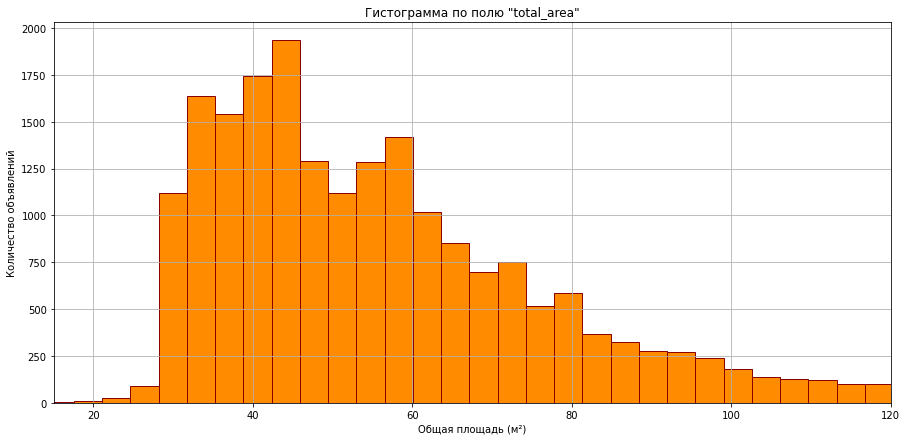

In [121]:
# Гистограмма по полю "total_area"
# Число корзин: 250
# Размер графика: 15 на 7;
df.hist('total_area', bins=250, figsize=(15, 7), color='darkorange', ec='darkred')

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Общая площадь (м²)')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "total_area"')

# Устанавливаем границу по X-оси в (15, 200)
plt.xlim(15, 120)

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Основная масса объявлений содержит недвижимость с общей площадью примерно в рамках от 30м<sup>2</sup> до 80м<sup>2</sup>;
- Самыми распространёнными являются квартиры общей площадью примерно 45м<sup>2</sup>;
- Вероятно, что в части дальнейших характиристик мы увидим корреляцию, например, с ценой объекта, другими площадами и, возможно, ещё какими-нибудь характеристиками.

##### Жилая площадь

Построим гистограмму по полю `living_area`. Учитывая, что гистограмма по Общей площади изначально получилась с большим количеством визуальных пустот, здесь также сразу ограничимся по оси X до 200м<sup>2</sup>.

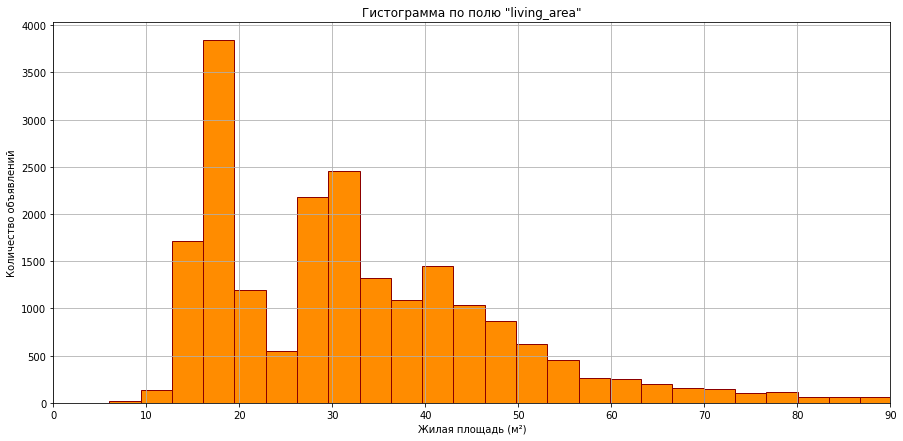

In [122]:
# Гистограмма по полю "living_area"
# Число корзин: 120
# Размер графика: 15 на 7;
df.hist('living_area', bins=120, figsize=(15, 7), color='darkorange', ec='darkred')

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Жилая площадь (м²)')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "living_area"')

# Устанавливаем границу по X-оси в 90
plt.xlim(0, 90)

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Основная масса объявлений содержит недвижимость с жилой площадью примерно в рамках от 13м<sup>2</sup> до 52м<sup>2</sup>;
- Самая популярная жилая площадь - от 15 до 19<sup>2</sup>;
- Имеется очень большой разброс по значениям площади, по причине небольшого количества объявлений с площадью от 80-90м<sup>2</sup>;
- Есть провал на отметке в 25м<sup>2</sup>. Возможно, это то значение площади для жилой части помещения, при котором наименее оптимально соотношение цена/площадь.

##### Площадь кухни

Построим гистограмму по полю `kitchen_area`. Учитывая, что гистограмма по Общей площади изначально получилась с большим количеством визуальных пустот, а также, учитывая, что кухни обычно меньше, чем жилая площадь, здесь  сразу ограничимся по оси X до 75м<sup>2</sup>.

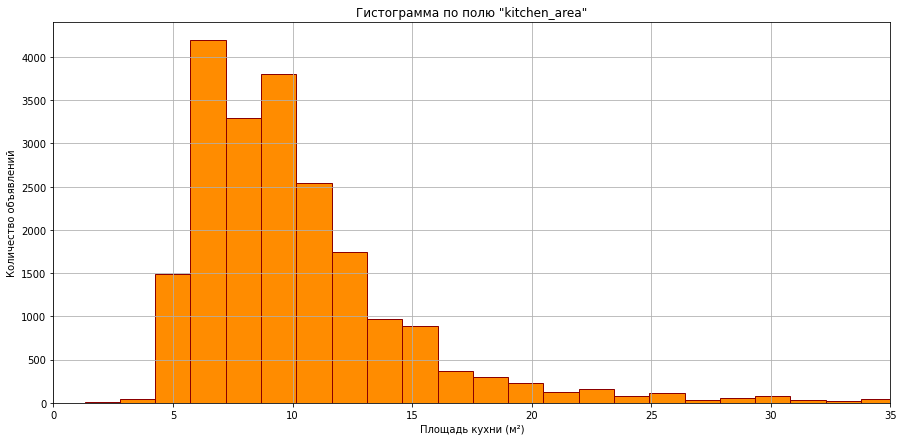

In [123]:
# Гистограмма по полю "kitchen_area"
# Число корзин: 75
# Размер графика: 15 на 7;
df.hist('kitchen_area', bins=75, figsize=(15, 7), color='darkorange', ec='darkred')

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Площадь кухни (м²)')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "kitchen_area"')

# Устанавливаем границу по X-оси в 35
plt.xlim(0, 35)

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Основная масса объявлений содержит недвижимость с жилой площадью примерно в рамках от 6м<sup>2</sup> до 15м<sup>2</sup>;
- Самые популярные площади кухни - 6м<sup>2</sup> и 9м<sup>2</sup>;
- Имеется очень большой разброс по значениям площади, по причине небольшого количества объявлений с площадью от 30м<sup>2</sup>;
- Есть провал на отметке в 8-9м<sup>2</sup>. Похожая ситуация с "провалом" наблюдается и для площади жилых помещений, что мы увидели в п.4.1.2.

##### Цена объекта

Построим гистограмму по полю `last_price`. По первоначальной гистограмме из п.1 мы увидели, что по оси X справа очень большая часть пустот. Это связано с очень малым количеством объявлений с крайне высокой ценой. Ограничимся по оси X объявлениями с ценой до 15 миллионов.

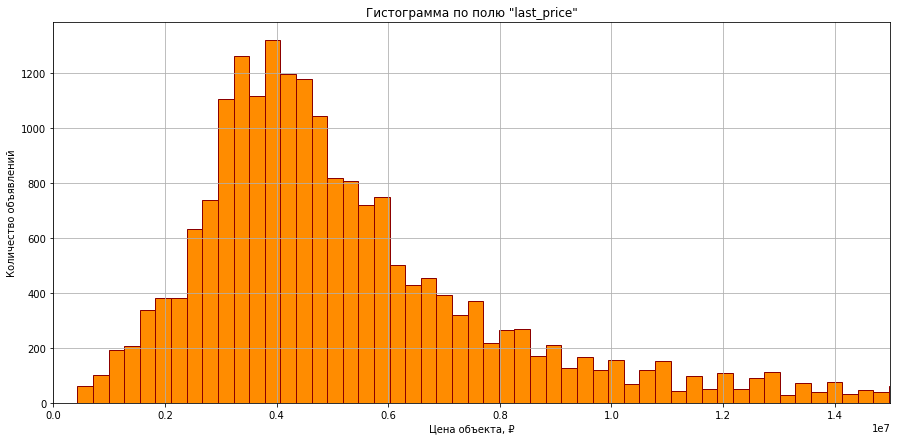

In [124]:
# Гистограмма по полю "last_price"
# Число корзин: 1500
# Размер графика: 15 на 7;
df.hist('last_price', bins=1500, figsize=(15, 7), color='darkorange', ec='darkred')

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Цена объекта, ₽')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "last_price"')

# Устанавливаем границу по X-оси в 15000000
plt.xlim(0, 15000000)

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Основная масса объявлений содержит недвижимость с ценой от 2 миллионов до 7 миллионов рублей;
- Гистограмма соответствует нормальному распределению, и самыми распространёнными ценами можно считать диапозон от 3 до 4,5 миллионов рублей;
- Гистограмма очень сильно "размазывается" в сторону увеличения цены, где очень мало объявлений с очень высокой ценой;
- В целом гистограмма напоминает нормальное распределение, примерно до отметки в 10 миллионов рублей.

##### Количество комнат

Построим гистограмму по полю `rooms_quantity`:

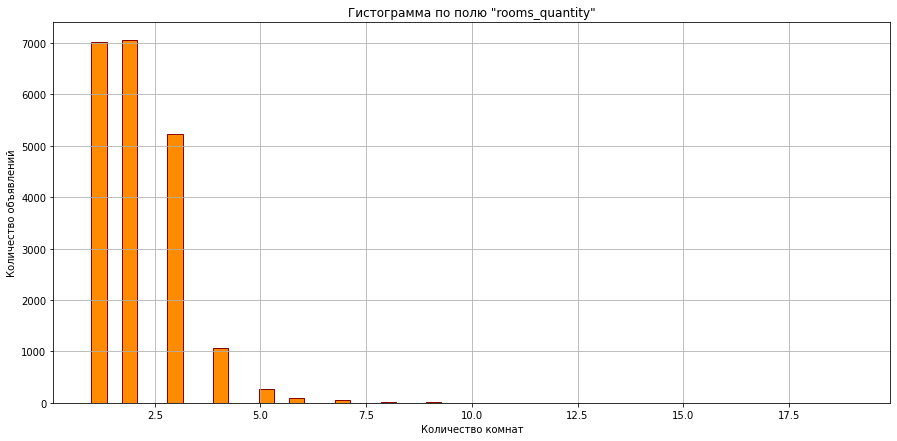

In [125]:
# Гистограмма по полю "rooms_quantity"
# Число корзин: 50
# Размер графика: 15 на 7;
df.hist('rooms_quantity', bins=50, figsize=(15, 7), color='darkorange', ec='darkred')

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "rooms_quantity"')

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Больше всего объявлений с 1- и 2-комнатными квартирами. Немного в этом уступают трёхкомнатные квартиры, и ещё сильнее четырёхкомнатные. Остальное - очень редкие, и почти невидимые на гистограмме;
- Количество комнат очень хорошо коллерирует с характиристиками из п.4.1.1. - 4.1.4. Вероятно, это последняя характиристика, которая имеем прямую связь с остальными характеристиками. Эту гипотезу мы проверим далее.

##### Высота потолков

Построим гистограмму по полю `ceiling_height`:

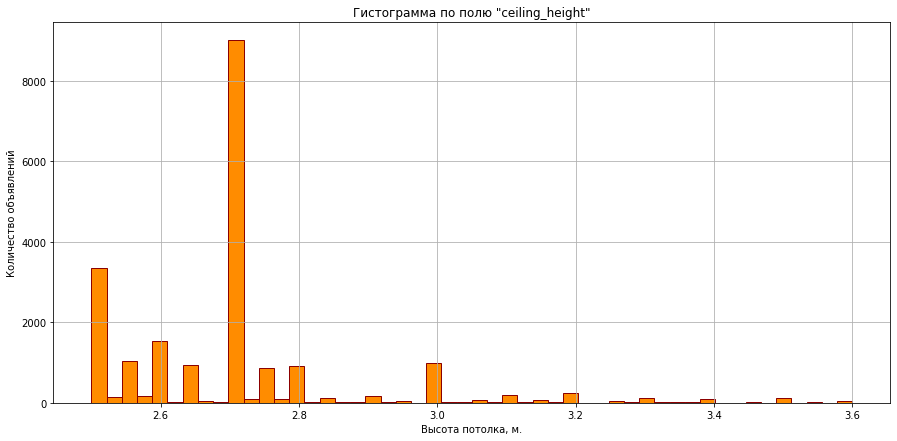

In [126]:
# Гистограмма по полю "ceiling_height"
# Число корзин: 50
# Размер графика: 15 на 7;
df.hist('ceiling_height', bins=50, figsize=(15, 7), color='darkorange', ec='darkred')

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Высота потолка, м.')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "ceiling_height"')

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Больше всего объявлений с высотой потолка 2.7м. На втором месте по "популярности" 2.5м. Здесь уже нет явной завсимости от предыдущих характиристик. 

##### Этаж квартиры

Построим гистограмму по полю `floor`:

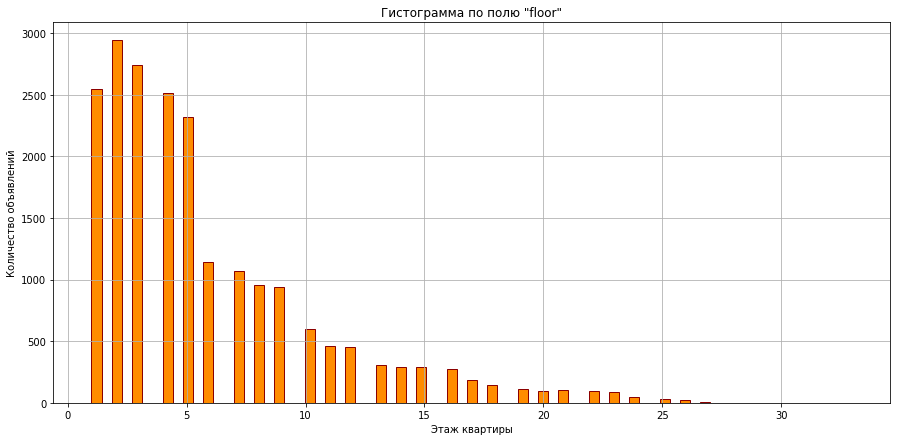

In [127]:
# Гистограмма по полю "floor"
# Число корзин: 75
# Размер графика: 15 на 7;
df.hist('floor', bins=75, figsize=(15, 7), color='darkorange', ec='darkred')

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "floor"')

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Этажи лидеры в объявлениях - это квартиры на 1-5 этажах. Такая разница, вероятнее всего, объясняется тем, что в России очень большой процент именно 5-этажных домов. Эту гипотезу мы проверим при построении гистограммы по полю `floors_total`. И в то же време, вероятно, чаще всего люди переезжают именно в новостройки, сдавая или продавая своё прежнее жилище;
- Хоть здесь и наблюдается корреляция с характеристиками из п. 4.1.1.- п.4.1.5., но скорее всего, здесь мы в первую очередь видим отражение количества домов той или иной этажности в среднем по стране.

##### Тип этажа квартиры

Построим гистограмму по полю `floor_position`. В данном случае функция метод `hist()` не сработает, так как он поддерживает только числовые значения. Построим гистограмму через группировку по полю `floor_position` с последующим использованием функции `count()`.

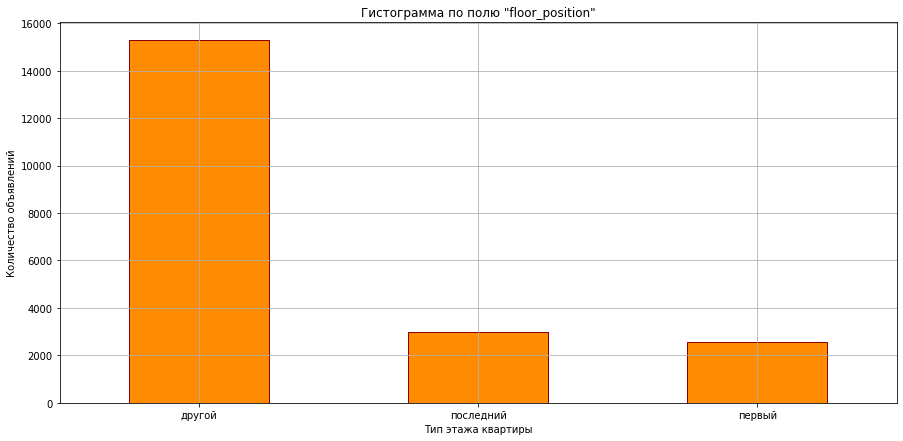

In [128]:
# Гистограмма по полю "floor_position"
# Размер графика: 15 на 7;
df.groupby('floor_position')['floor'].count().sort_values(ascending=False).plot(kind='bar', 
                                                                              grid=True, 
                                                                              figsize=(15, 7), 
                                                                              color='darkorange', 
                                                                              ec='darkred',
                                                                              rot=0)

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "floor_position"')

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Чаще всего встречаются объявления с квартирами на этажах, не являющихся первым или последним. Это объясняется статистически (куда меньше возможности быть последним или первым этажом, чем последним);
- В то же время количество объявлений с квартирами на первом этаже и последнем этаже, вероятно, больше, чем могло бы быть, по причине немалого количества малоэтажных домов. А также, более вероятным стремлением сдать или продать квартиру на первом или последнем этаже, кои многие люди часто не любят.

##### Общее количество этажей в доме

Построим гистограмму по полю `floors_total`:

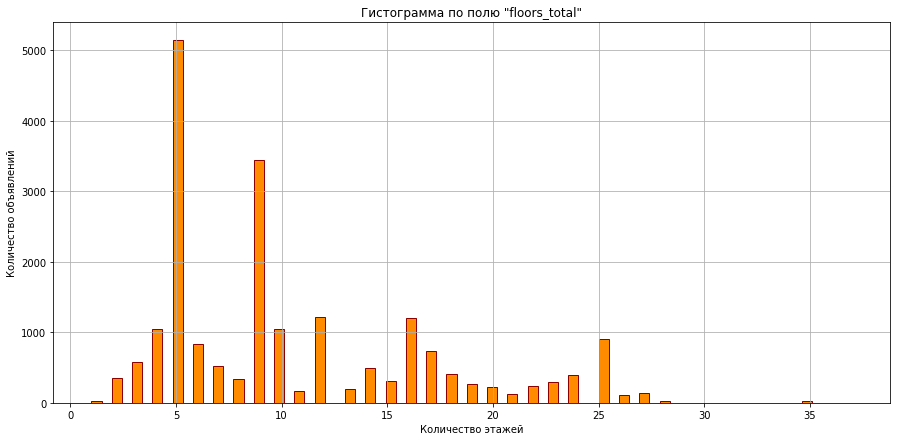

In [129]:
# Гистограмма по полю "floors_total"
# Число корзин: 75
# Размер графика: 15 на 7;
df.hist('floors_total', bins=75, figsize=(15, 7), color='darkorange', ec='darkred')

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Количество этажей')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "floors_total"')

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Как мы и предположили в п. 4.1.7., больше всего объявлений с квартирами в 5-этажных домах. На втором месте 9-этажные дома. В целом это согласуется и с личным, субъективным опытом, если жить в крупных городах.

##### Расстояние до центра города (в метрах)

Построим гистограмму по полю `city_centers_nearest`:

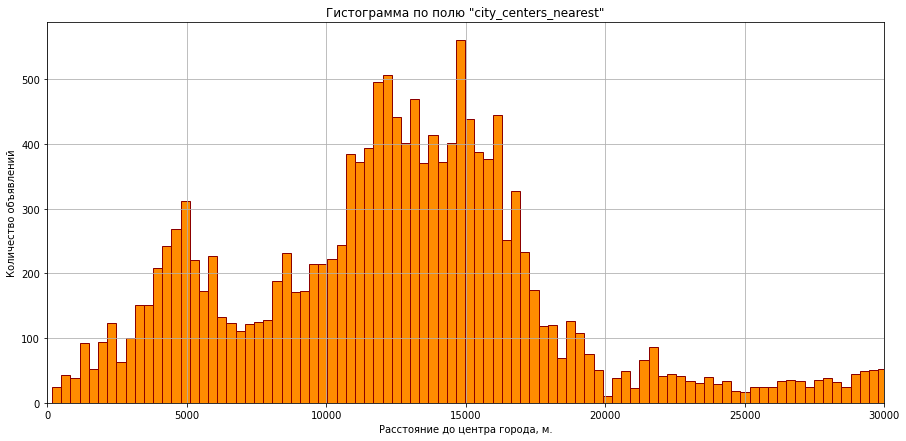

In [130]:
# Гистограмма по полю "city_centers_nearest"
# Число корзин: 75
# Размер графика: 15 на 7;
df.hist('city_centers_nearest', bins=200, figsize=(15, 7), color='darkorange', ec='darkred')

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Расстояние до центра города, м.')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "city_centers_nearest"')

# Устанавливаем границу по X-оси в 30000
plt.xlim(0, 30000)

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Больше всего объявлений с расстоянием до центра города в районе от 5 км до 18 км;
- Учитывая, что большинство городов от центра до окраины едва ли имеют расстояние в 6-8 км, это может ещё раз подтверждать гипотезу из п. 2.2.8.4. о том, что в случае небольших городов идёт расчёт расстояния до центра столицы региона;
- Учитывая выше сказанное, можно сделать вывод о том, что определение центра города в картографической системе происходит неверно, либо сам столбец нуждается в дополнительном пояснении, что именно понимается под "расстоянием до центра *города*".
- Видим пик в 15 км. Если вывод ранее был сделан верно, то значит, что это всё объявления из Санкт-Петербурга в спальных районах, или его городов-спутников;
- Также видим провал на отметке примерно от 6250 метров до 7600 метров до центра города. Вероятно, это могут быть офисные или производственные районы.

##### Расстояние до ближайшего аэропорта

Построим гистограмму по полю `airports_nearest`:

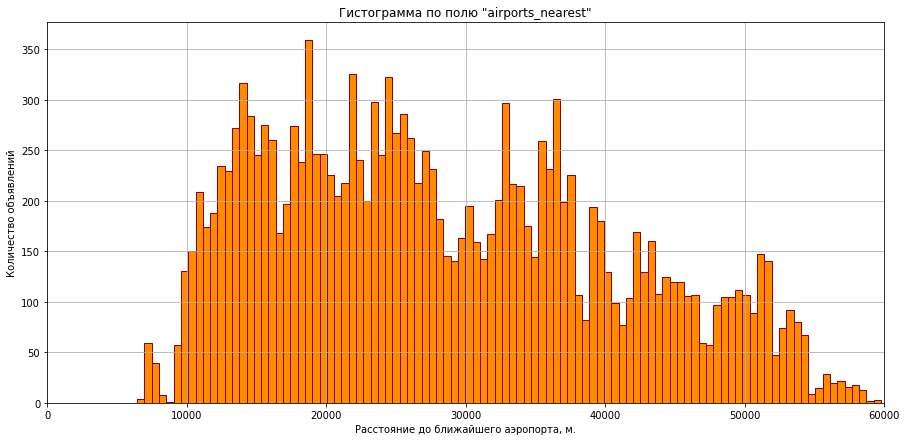

In [131]:
# Гистограмма по полю "airports_nearest"
# Число корзин: 75
# Размер графика: 15 на 7;
df.hist('airports_nearest', bins=150, figsize=(15, 7), color='darkorange', ec='darkred')

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Расстояние до ближайшего аэропорта, м.')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "airports_nearest"')

# Устанавливаем границу по X-оси в  60000
plt.xlim(0, 60000)

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Очень большой процент объявлений с квартирами, находящимися на расстоянии от 10 до 50 км. Это может объясняться тем, что аэропорты часто находятся на окраине городов. Также, большой вес может иметь то, что в небольших поселениях обычно не бывает собственных аэропортов, поэтому расстояние рассчитывается до ближайшего;
- Объявлений с адресами менее 10 км крайне мало на фоне общего количества объявлений;
- На расстоянии от 28 км до 32 км наблюдается некоторый провал.

##### Расстояние до ближайшего парка

Построим гистограмму по полю `parks_nearest`:

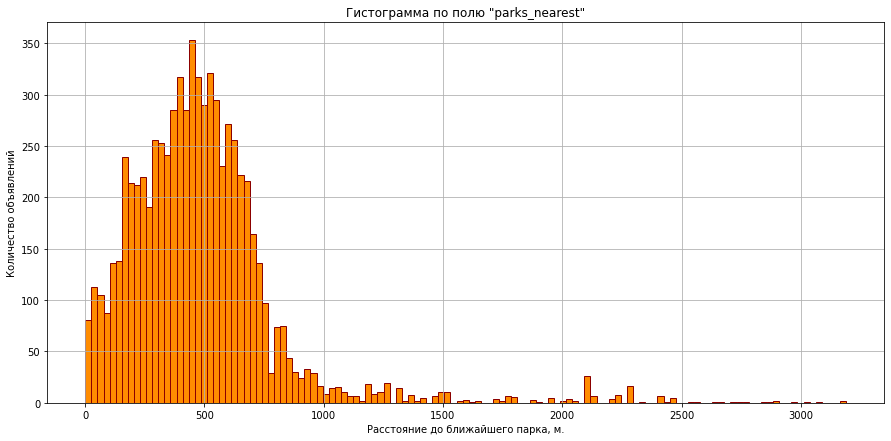

In [132]:
# Гистограмма по полю "parks_nearest"
# Число корзин: 125
# Размер графика: 15 на 7;
df.hist('parks_nearest', bins=125, figsize=(15, 7), color='darkorange', ec='darkred')

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Расстояние до ближайшего парка, м.')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "parks_nearest"')

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Наиболее распространены объявления с расстоянием от 200 м до 750 м до ближайшего парка. В основном сама по себе гистограмма больше говорит об инфраструктуре городов. Для определения наличия или отсутствия связи с ценой нужно выполнять отдельный анализ.

##### День и месяц публикации объявления

Построим гистограмму по полям `exposition_weekday`, `exposition_month`:

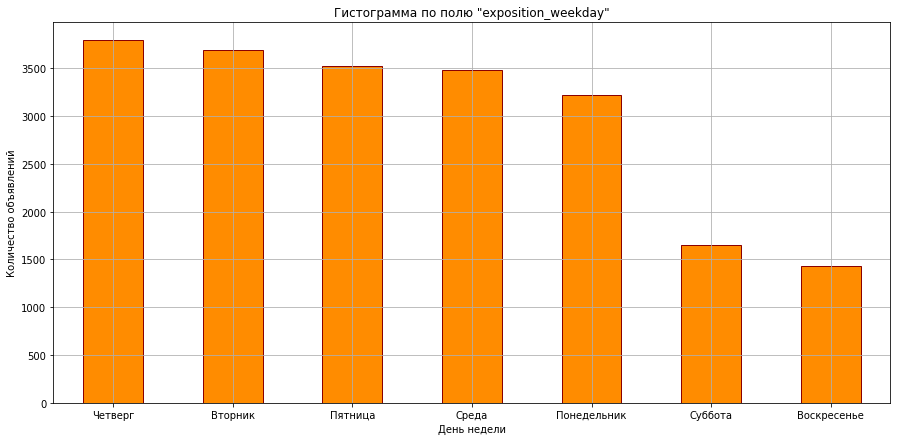

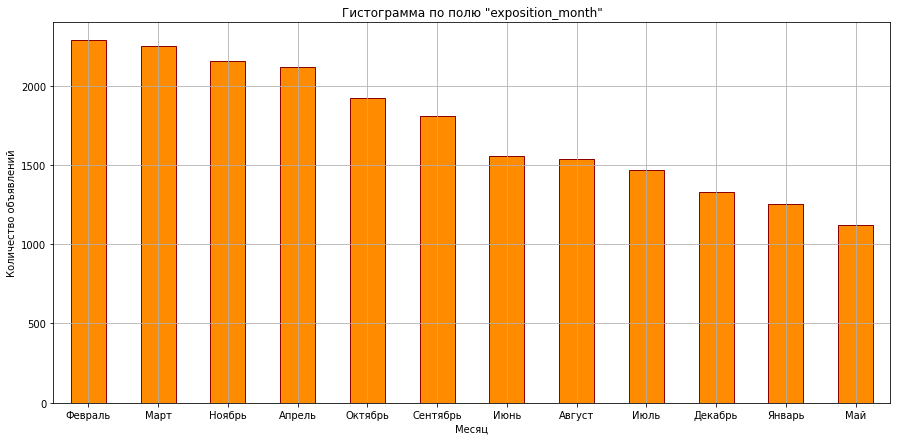

In [133]:
# Гистограмма по полю "exposition_weekday"
# Размер графика: 15 на 7;
df.merge(weekday_dict, left_on='exposition_weekday', right_on='weekday_id') \
.groupby('weekday_name')['exposition_date'].count().sort_values(ascending=False).plot(kind='bar', 
                                                                              grid=True, 
                                                                              figsize=(15, 7), 
                                                                              color='darkorange', 
                                                                              ec='darkred',
                                                                              rot=0)

# Именуем оси и название, чтобы график был более понятным
plt.title('Гистограмма по полю "exposition_weekday"')
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')

# Отображаем график на экране
plt.show()


# Гистограмма по полю "exposition_month"
# Размер графика: 15 на 7;
df.merge(month_dict, left_on='exposition_month', right_on='month_id') \
.groupby('month_name')['exposition_date'].count().sort_values(ascending=False).plot(kind='bar', 
                                                                              grid=True, 
                                                                              figsize=(15, 7), 
                                                                              color='darkorange', 
                                                                              ec='darkred',
                                                                              rot=0)

# Именуем оси и название, чтобы график был более понятным
plt.title('Гистограмма по полю "exposition_month"')
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- Наглядно видно, что наименее часто люди занимаются объявлениями в выходные дни недели, а также в месяцы, где много праздников. А также, в летние месяцы, что также наводит на мысль о том, что в этот период люди чаще берут отпуска и отдыхают.

##### Вывод

Мы выполнили обзор ряда характеристик и получил чёткое понимание того, как они распределяются в разрезе количества объявлений. Проблем, связанных с пропусками/дублями/аномалиями не выявлено, значит этап предобработки данных был выполнен корректно.

Эта информация будет учитываться в остальной части исследования, а также формировании финального вывода и рекомендаций.

#### Анализ "скорости" продаж квартир

Проанализируем, насколько быстро или медленно продаются картиры. Для этого воспользуемся информацией из столбца `days_exposition`. Проведём эту работу в 3 этапа:
- Построим гистограмму по полю `days_exposition`;
- Посчитаем среднее и медиану по значениям поля;
- Определим, что можно считать быстрой продажей, а что долгой.

##### Гистограмма длительности размещения объявления (количество дней)

Построим гистограмму:

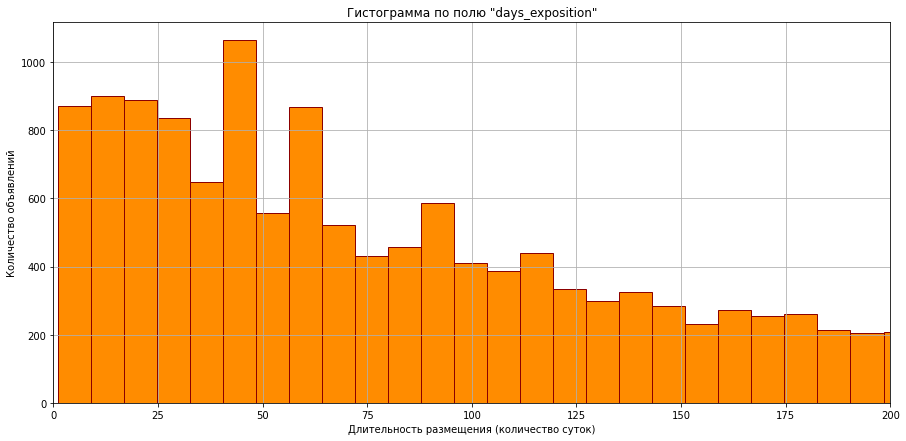

In [134]:
# Гистограмма по полю "days_exposition"
# Число корзин: 200
# Размер графика: 15 на 7;
df.hist('days_exposition', bins=200, figsize=(15, 7), color='darkorange', ec='darkred')

# Именуем оси и название, чтобы график был более понятным
plt.xlabel('Длительность размещения (количество суток)')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма по полю "days_exposition"')

# Ограничимся по оси X до 200 суток
plt.xlim(0, 200)

# Отображаем график на экране
plt.show()

***Из гистограммы можем сделать следующие наблюдения***:
- В целом мы видим достаточно плавное уменьшение количества объявлений в зависимости от длительности его нахождения в открытом состоянии;
- Но при этом, выражены 3 пика, которые выбиваются из этого плавного уменьшения. То есть, в целом эти пики можно предварительно считать "типичными" затратами времени на продажу квартиры. В данном случае эти пики примерно таковы: от 40 до 48 дней, от 55 до 64 дней и от 87 до 94 дней;
- Можно предположить, что скорость продажи квартиры имеет сильное влияние от цены. Мы можем проверить это, построив диаграмму рассеяния.

In [135]:
df['days_exposition'].describe()

count    17943.000000
mean       185.828290
std        222.093863
min          1.000000
25%         45.000000
50%        102.000000
75%        240.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Здорово, что зависимость переменных рассматриваешь через тип графика scatter
</div>

И также попробуем рассчитать коэффициент корреляции между этими двумя характеристиками:

In [137]:
df[['last_price', 'days_exposition']].corr()

,last_price,days_exposition
last_price,1.000000,0.086609
days_exposition,0.086609,1.000000


***Из диаграммы и коэффициенту корреляции можем сделать следующие выводы***:
- Исходя из диаграммы гипотеза подтвердилась. Видим явное преимущество в скорости продажи квартир с объявлениями ценой около до 1,5 миллионов рублей. И в то же время видим, что квартир до 1 миллиона в целом гораздо больше. Вероятно, это влияние от продаж в небольших населённых пунктах, а также, вторичного рынка;
- На графике видно интересные вертикальные "лесенки". Например, для квартир, проданных примерно за 40 дней отчётливо видно большое количество объявлений с ценами от 1 до 4 миллионов рублей. Аналогично для квартир, проданных примерно за 60 дней - достаточно много предложений от 5 до 10 миллионов. И последняя подобная видимая вертикальная часть "лесенки": квартиры, проданные за 90 дней, часто стоят от 10 до 15 миллионов, хоть контраст и не такой большой, как в первых двух случаях. Учитывая, что `days_exposition` рассчитывает корректно, как мы проверяли в п. 2.2.12.2., вряд ли здесь имеет место быть аномалия в данных. Но тем неменее, факт примечательный;
- Коэффициент корреляции, равный 0.09, противоречит тому, что мы видим на графике, если мы правильно его интерпретировали. Если так, то вероятно, здесь имеет место быть не прямая зависимость, а через какую-то иную характеристику.

##### Числовое описание "days_exposition"

Посмотрим на числовое описание и график распределения поля `days_exposition`:

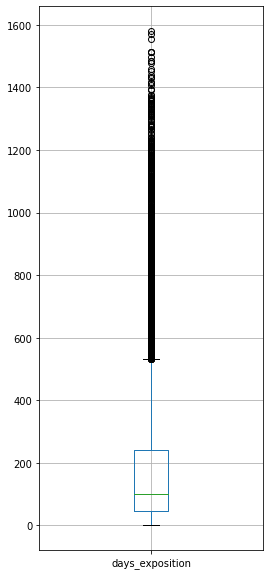

count    17943.000000
mean       185.828290
std        222.093863
min          1.000000
25%         45.000000
50%        102.000000
75%        240.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [138]:
# Строим график "Ящик с усами" по колонке "ceiling_height"
# Ограничиваем выборку по ceiling_height <= 5, чтобы межквартильный размах не сузился до одной линии, а выбросы было видно чётче
df.boxplot(column='days_exposition', figsize=(4, 10))

# Отображаем график на экране
plt.show()

# Выводим на экран числовое описание данных для "ceiling_height"
df['days_exposition'].describe()

##### Вывод

***Можем сделать следующие выводы на основании графика и числового описания***:
- Обычно время продажи квартиры занимает чуть дольше 3 месяцев;
- Из-за относительно небольшого количества объявлений с крайне большим временем пребывания в открытом состоянии (менее 25% от общего количества) среднее значение сдвинуто выше, примерно к полугоду, что не совсем точно отражает реальную картину;
- Быстрыми продажами можно считать те, что занимают около 1,5 месяцев и меньше. Типичным временем продажи можно считать 3,5 месяца. Долгим временем продажи можно считать те случаи, когда объявление открыто более 8 месяцев.

#### Влияние характеристик на стоимость объекта

##### Влияние общей площади

Рассмотрим наличие зависимости цены от общей площади квартиры.
Попробуем построить диаграмму рассеяния и hexbin-график, и сравнить, какой из них более нагляден.

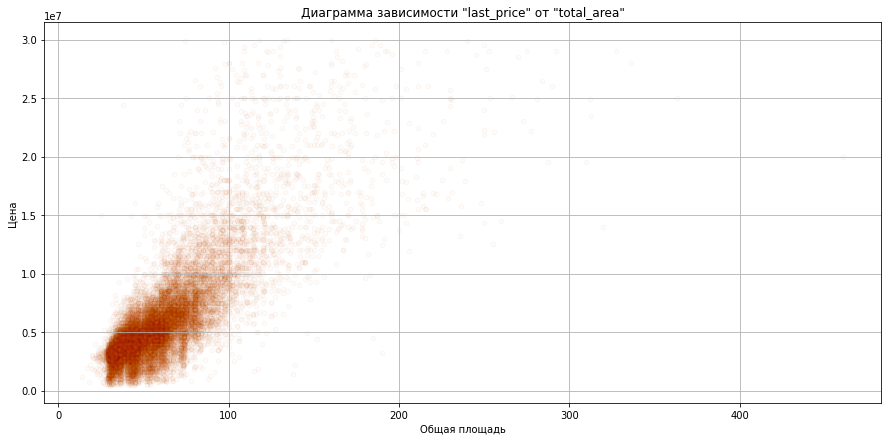

In [139]:
# Диаграмма рассеяния по полям "last_price" от "total_area"
# Размер графика: 15 на 7;
df[df['last_price'] < 30000000].plot(x='total_area', 
                                     y='last_price', 
                                     kind='scatter',
                                     grid=True,
                                     figsize=(15, 7), 
                                     color='darkorange', 
                                     ec='darkred',
                                     alpha=0.03)

# Именуем оси и название, чтобы диаграмма была более понятна
plt.title('Диаграмма зависимости "last_price" от "total_area"')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')

# Отображаем диаграмму на экране
plt.show()

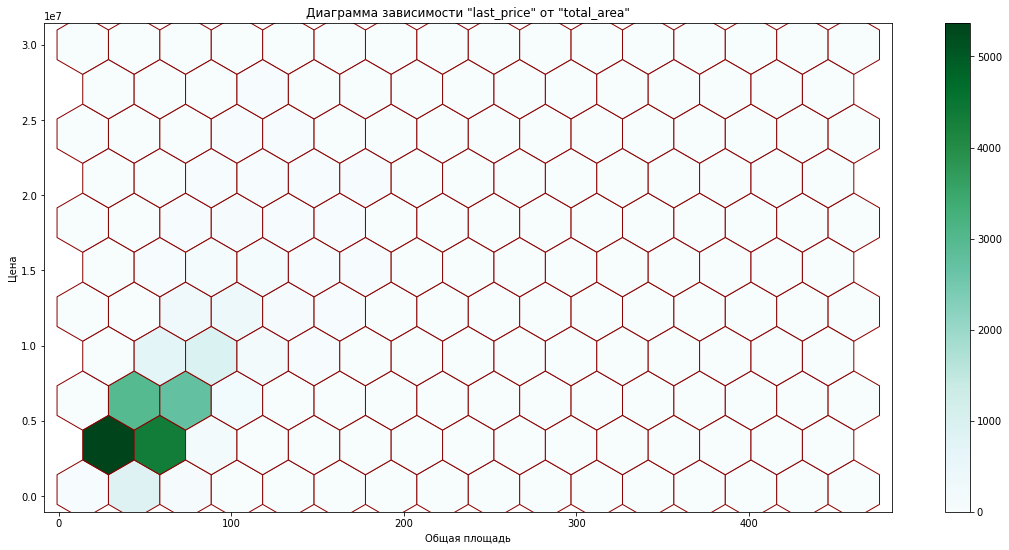

In [140]:
# Диаграмма рассеяния по полям "last_price" от "total_area"
# Размер графика: 15 на 7;
df[df['last_price'] < 30000000].plot(x='total_area', 
                                     y='last_price', 
                                     kind='hexbin',
                                     gridsize=(15, 5),
                                     sharex=False,
                                     figsize=(19, 9), 
                                     ec='darkred')

# Именуем оси и название, чтобы диаграмма была более понятна
plt.title('Диаграмма зависимости "last_price" от "total_area"')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')

# Отображаем диаграмму на экране
plt.show()

Рассчитаем также кэффициент корреляции между этими характеристиками:

In [141]:
df[['last_price', 'total_area']].corr()

,last_price,total_area
last_price,1.000000,0.686169
total_area,0.686169,1.000000


***Из диаграммы, графика и коэффициента корреляции можем сделать следующие выводы***:
- Цена действительно имеет существенное влияние от общей площади. Например, для общей площади около 30м<sup>2</sup> можно найти квартиры ценой в 2,5 миллиона рублей. Но для квартир с площадью 80м<sup>2</sup> таких предложений уже почти не найти;
- Оба варианта визуализации вполне наглядны. В дальнейшем будем использовать диаграмму рассеяния.

##### Влияние жилой площади

Рассмотрим наличие зависимости цены от жилой площади квартиры:

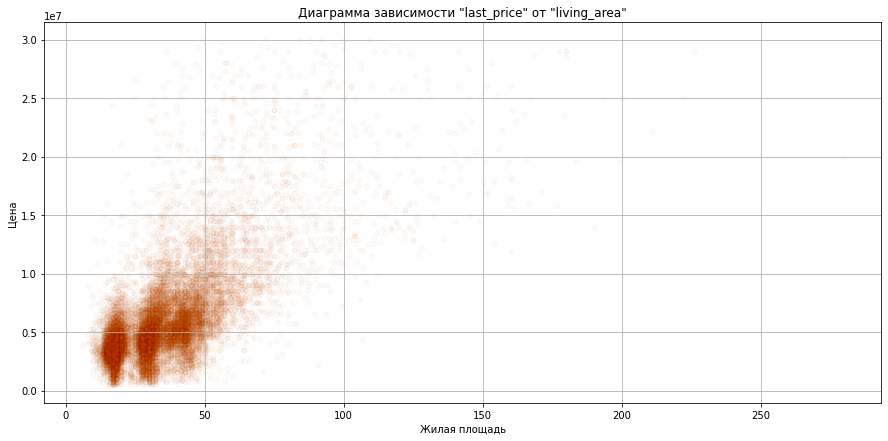

In [142]:
# Диаграмма рассеяния по полям "last_price" от "living_area"
# Размер графика: 15 на 7;
df[df['last_price'] < 30000000].plot(x='living_area', 
                                     y='last_price', 
                                     kind='scatter',
                                     grid=True,
                                     figsize=(15, 7), 
                                     color='darkorange', 
                                     ec='darkred',
                                     alpha=0.03)

# Именуем оси и название, чтобы диаграмма была более понятна
plt.title('Диаграмма зависимости "last_price" от "living_area"')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')

# Отображаем диаграмму на экране
plt.show()

Рассчитаем также кэффициент корреляции между этими характеристиками:

In [143]:
df[['last_price', 'living_area']].corr()

,last_price,living_area
last_price,1.000000,0.599162
living_area,0.599162,1.000000


***Из диаграммы и коэффициента корреляции можем сделать следующие выводы***:
- Цена действительно имеет влияние от жилой площади, но несколько меньше, чем от общей площади Это выражается как в коэффициенте, так и в графике;
- На графике видно, как на отметке в 25м<sup>2</sup> существенно меньше корреляции, нежели при меньших и больших значениях жилой площади. Возможно, это связано с меньшим количеством подобных предложений, или от каких-то других неочевидных факторов.

##### Влияние площади кухни

Рассмотрим наличие зависимости цены от площади кухни:

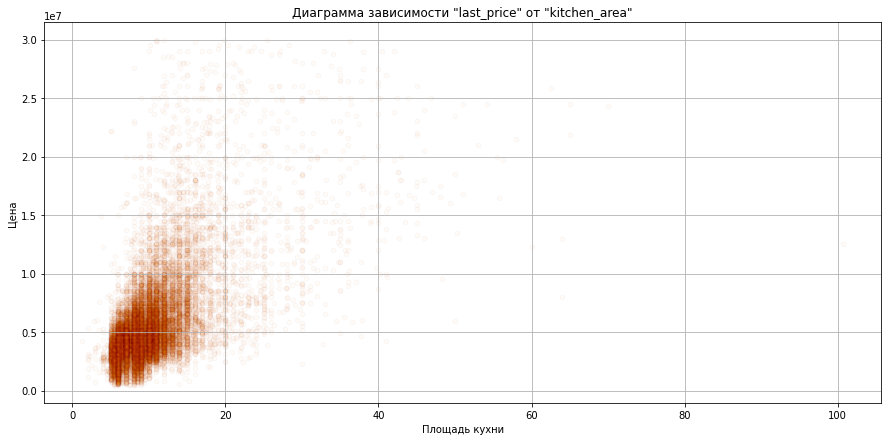

In [144]:
# Диаграмма рассеяния по полям "last_price" от "kitchen_area"
# Размер графика: 15 на 7;
df[df['last_price'] < 30000000].plot(x='kitchen_area', 
                                     y='last_price', 
                                     kind='scatter',
                                     grid=True,
                                     figsize=(15, 7), 
                                     color='darkorange', 
                                     ec='darkred',
                                     alpha=0.03)

# Именуем оси и название, чтобы диаграмма была более понятна
plt.title('Диаграмма зависимости "last_price" от "kitchen_area"')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')

# Отображаем диаграмму на экране
plt.show()

Рассчитаем также кэффициент корреляции между этими характеристиками:

In [145]:
df[['last_price', 'kitchen_area']].corr()

,last_price,kitchen_area
last_price,1.000000,0.518462
kitchen_area,0.518462,1.000000


***Из диаграммы и коэффициента корреляции можем сделать следующие выводы***:
- Цена действительно имеет ещё меньше влияния от площади кухни, чем от жилой и общей площадей, хоть оно и наблюдается;
- На диаграмме заметно, будто разнообразие площадей кухни менее разнообразно, чем у жилой площади. Это выражается в этаких "вертикальных полосах" с пустотами между ними. Возможно, это из-за того, что здесь сетка имеет меньший шаг.

##### Влияние количества комнат

Рассмотрим наличие зависимости цены от площади кухни:

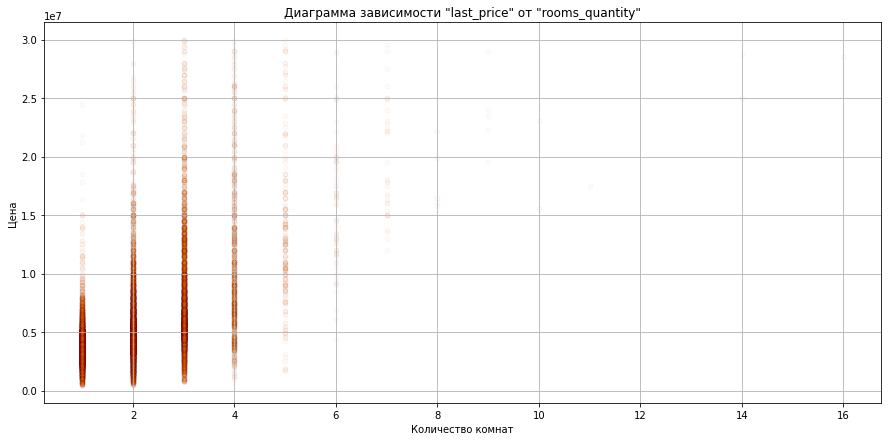

In [146]:
# Диаграмма рассеяния по полям "last_price" от "rooms_quantity"
# Размер графика: 15 на 7;
df[df['last_price'] < 30000000].plot(x='rooms_quantity', 
                                     y='last_price', 
                                     kind='scatter',
                                     grid=True,
                                     figsize=(15, 7), 
                                     color='darkorange', 
                                     ec='darkred',
                                     alpha=0.03)

# Именуем оси и название, чтобы диаграмма была более понятна
plt.title('Диаграмма зависимости "last_price" от "rooms_quantity"')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')

# Отображаем диаграмму на экране
plt.show()

Рассчитаем также кэффициент корреляции между этими характеристиками:

In [147]:
df[['last_price', 'rooms_quantity']].corr()

,last_price,rooms_quantity
last_price,1.000000,0.388939
rooms_quantity,0.388939,1.000000


***Из диаграммы и коэффициента корреляции можем сделать следующие выводы***:
- Цена действительно имеет достаточно маленькое влияние от количества комнат, особенно на фоне влияние общей площади. Вероятно, что ключевое значение, условно процентов на 68 цена действительно зависит от площади. А именно - от цены за один квадратный метр (её мы рассчитаем позже). В этом случае вполне реалистично выглядит, что остальные остальное влияние в лице 32% - это совокупность остальных факторов, таких, как количетво комнат, расстояние до центра города и других инфраструктурных географических факторов.

##### Влияние расположения этажа

Рассмотрим наличие зависимости цены от расположения этажа:

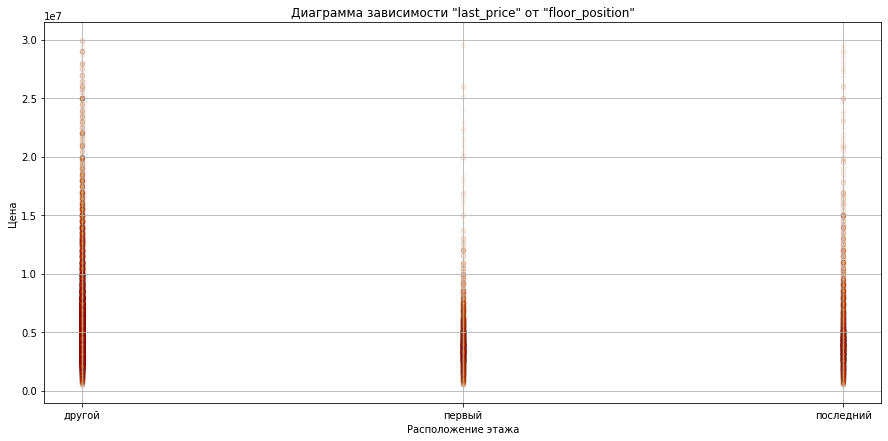

In [148]:
# Диаграмма рассеяния по полям "last_price" от "floor_position"
# Размер графика: 15 на 7;
df[df['last_price'] < 30000000].plot(x='floor_position', 
                                     y='last_price', 
                                     kind='scatter',
                                     grid=True,
                                     figsize=(15, 7), 
                                     color='darkorange', 
                                     ec='darkred',
                                     alpha=0.03)

# Именуем оси и название, чтобы диаграмма была более понятна
plt.title('Диаграмма зависимости "last_price" от "floor_position"')
plt.xlabel('Расположение этажа')
plt.ylabel('Цена')

# Отображаем диаграмму на экране
plt.show()

***Из диаграммы можем сделать следующие выводы***:
- Цена действительно зависит от расположения этажа. Как видно, цены квартир на 1 этаже имеют куда меньшее количество дорогих квартир. Это может быть связано с тем, что люди не любят квартиры на 1 этаже по причине близости к дорогам, тротуарам и в целом близости к прохожим. 
- Последний этаж также имеет более низкие цены, чем "Другие", но всё же, не такие низкие, как у первых этажей. Соответственно, такой вариант, вероятно, более предпочтителен для покупателей, нежели первый этаж;
- Остальные этажи имеют достаточно высокий разброс цен, но в целом количество дорогих существенно выше;
- Коэффициент корреляции в данном случае будет бесполезно, так как расположение этажа - категориальная переменная.

##### Влияние расположения даты размещения

###### Влияние дня недели

Рассмотрим наличие зависимости цены от дня недели публикации объявления:

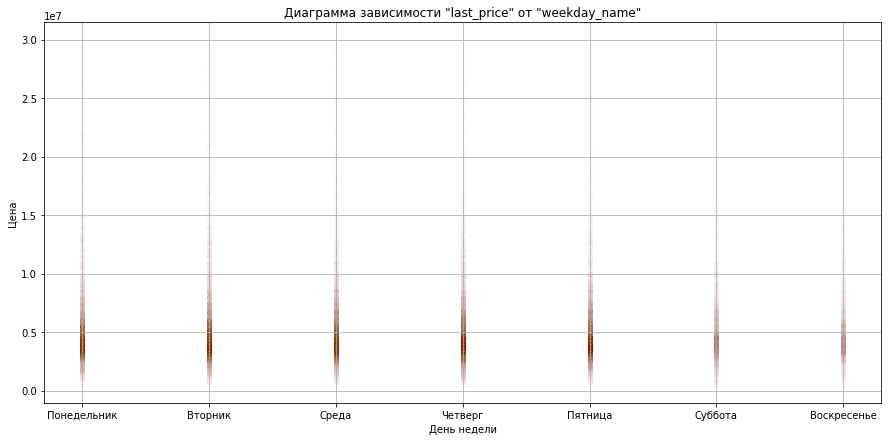

In [149]:
# Диаграмма рассеяния с зависимостью "last_price" от "exposition_weekday"
# Размер графика: 15 на 7;
df[df['last_price'] < 30000000].merge(weekday_dict, left_on='exposition_weekday', right_on='weekday_id')\
.sort_values(by='weekday_id').plot(kind='scatter', 
                                   x='weekday_name',
                                   y='last_price',
                                   grid=True,
                                   figsize=(15, 7), 
                                   color='darkorange',
                                   ec='darkred',
                                   alpha=0.003)

# Именуем оси и название, чтобы диаграмма была более понятна
plt.title('Диаграмма зависимости "last_price" от "weekday_name"')
plt.xlabel('День недели')
plt.ylabel('Цена')

# Отображаем диаграмму на экране
plt.show()

***Из диаграммы можем сделать следующие выводы***:
- Цена объявлений никак не зависит от дня недели, в котором создаётся объявление. Субботу и воскресенье - исключение, но в их случае речь скорее не об изменении цены, а о том, что в них попросту меньше объявлений;
- Коэффициент корреляции в данном случае будет бесполезно, так как день недели - категориальная переменная.

###### Влияние месяца

Рассмотрим наличие зависимости цены от месяца публикации объявления:

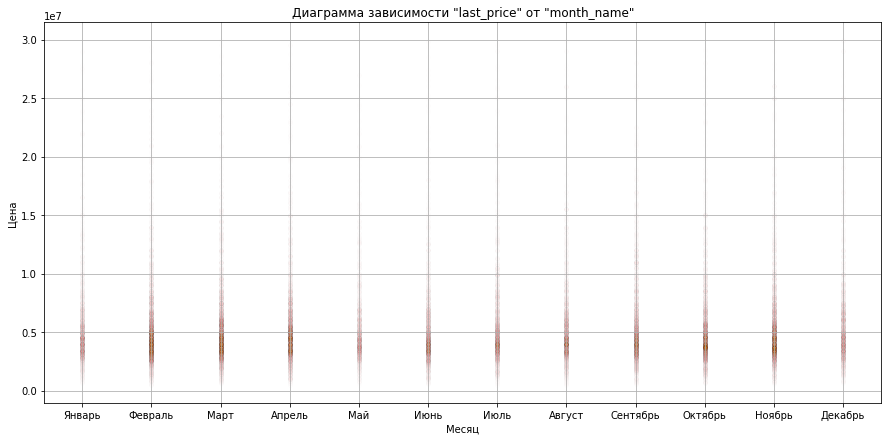

In [150]:
# Диаграмма рассеяния с зависимостью "last_price" от "exposition_month"
# Размер графика: 15 на 7;
df[df['last_price'] < 30000000].merge(month_dict, left_on='exposition_month', right_on='month_id').sort_values(by='month_id')\
.plot(kind='scatter', 
      x='month_name',
      y='last_price',
      grid=True,
      figsize=(15, 7), 
      color='darkorange',
      ec='darkred',
      alpha=0.003)

# Именуем оси и название, чтобы диаграмма была более понятна
plt.title('Диаграмма зависимости "last_price" от "month_name"')
plt.xlabel('Месяц')
plt.ylabel('Цена')

# Отображаем диаграмму на экране
plt.show()

***Из диаграммы можем сделать следующие выводы***:
- Цена объявлений никак не зависит от месяца, в котором создаётся объявлений;
- Коэффициент корреляции в данном случае будет бесполезно, так как месяц - категориальная переменная.

###### Влияние года

Рассмотрим наличие зависимости цены от года публикации объявления:

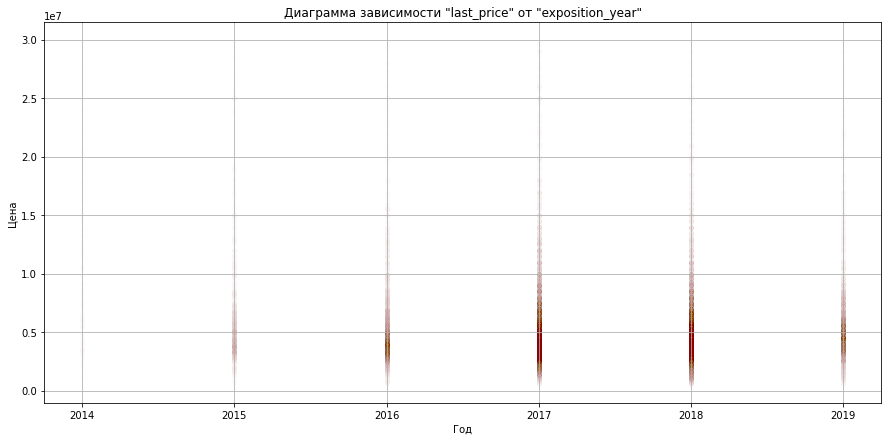

In [151]:
# Диаграмма рассеяния с зависимостью "last_price" от "exposition_year"
# Размер графика: 15 на 7;
df[df['last_price'] < 30000000].plot(x='exposition_year', 
                                     y='last_price', 
                                     kind='scatter',
                                     grid=True,
                                     figsize=(15, 7), 
                                     color='darkorange', 
                                     ec='darkred',
                                     alpha=0.003)

# Именуем оси и название, чтобы диаграмма была более понятна
plt.title('Диаграмма зависимости "last_price" от "exposition_year"')
plt.xlabel('Год')
plt.ylabel('Цена')

# Отображаем диаграмму на экране
plt.show()

В результатах сильно бросается в глаза 2014 год и 2019 год. Будто в них меньше данных. Проверим, создав сводную таблицу:

In [152]:
df.pivot_table(index='exposition_year', values='last_price', aggfunc='count').reset_index()

,exposition_year,last_price
0,2014,126
1,2015,1058
2,2016,2516
3,2017,7358
4,2018,7204
5,2019,2533


***Из диаграммы можем сделать следующие выводы***:
- Действительно, в 2014 и 2019 годах объявлений мало. В 2019 году это может объясняться тем, что срез данных мог быть сделан за неполный 2019 год. Аналогично с 2014 годом. Либо же по причине недостатка данных в базе или некорректной выгрузке данных в датасет. Но в данном случае причина не играет важной роли;
- Также видим, что объявлений в 2015 и 2016 годах тоже существенно меньше. Поэтому оценка влияния года в данных условиях будет не совсем корректна ввиду серьёзных отличий в объёмах данных за каждый год. Из соседних годов соизмеримы только 2017 и 2018 года, но диаграмма как раз показывает, что разницы в ценах между этими годами почти нет;
- Коэффициент корреляции в данном случае будет бесполезно, так как год - категориальная переменная.

##### Вывод

- Наибольшее влияние на цену недвижимости имеет общая площадь квартиры, что мы увидели в п. 4.3.1.
- Жилая площадь и площадь кухни хоть и имеют своё влияние, но скорее всего наиболее прямолинейная зависимость идёт именно от совокупной, т.е. общей площади;
- Количество комнат имеет небольшое влияние на цену;
- Расположение этажа имеет умеренное влияние на цену квартиры. Как минимум, отчётливо видна разница между первым и другими этажами;
- Дата размещения никак не влияет на цену. В случае с влиянием года на цену мы получили не самый объективный результат, потому что в датасете всего 2 года имеют соизмеримое количество объявлений.

#### Средняя цена квадратного метра (топ-10 населённых пунктов по число объявлений)

В пункте 3.1. мы создали и заполнили столбец "***price_square_meter***". Используем этот столбец, чтоб найти среднюю цену одного квадратного метра на основе 10 населённых пунктов с наибольшим числом объявлений. Для начала посмотрим на таблицу с такими населёнными пунктами:

In [153]:
df_offers_top10 = df.pivot_table(index=['locality_type', 'locality_name'], values='price_square_meter', aggfunc={'count', 'mean'})\
.reset_index().sort_values(by='count', ascending=False)\
.rename(columns={'count': 'offers_count', 'mean': 'price_square_meter_mean'}).head(10)

df_offers_top10['price_square_meter_mean'] = round(df_offers_top10['price_square_meter_mean'], 2)

df_offers_top10

,locality_type,locality_name,offers_count,price_square_meter_mean
33,город,Санкт-Петербург,13927,113704.96
211,посёлок,Мурино,427,85256.84
294,посёлок,Шушары,390,78366.62
3,город,Всеволожск,354,68906.44
32,город,Пушкин,337,103291.30
13,город,Колпино,320,75260.75
224,посёлок,Парголово,287,90711.64
6,город,Гатчина,286,68505.88
77,деревня,Кудрово,226,92248.48
4,город,Выборг,190,58319.35


Мы сформировали топ-10 городов с наибольшим количеством объявлений, и в поле `offers_count` посчитали количество этих объявлений. А в поле `price_square_meter_mean` посчитали среднюю стоимость квадратного метра по населённому пункту.

Теперь на основе городов датафрейма `df_offers_top10` посчитаем среднее значение квадратного метра. Также, ограничимся по цене квартиры меньше 30 миллионов, так как более дорогие квартиры сильно влияют на среднее значение при том, что это далеко от общедоступного ценового сегмента. В том, что объявлений с дорогими квартирами существенно меньше, мы убедились в п. 4.1.4.

In [154]:
print('Средняя стоимость квадратного метра:', \
      round(df.query('locality_name in @df_offers_top10["locality_name"] and last_price < 30000000')['price_square_meter']\
            .mean(), 2), 'рублей')

Средняя стоимость квадратного метра: 104654.71 рублей


Мы узнали, что средняя стоимость квадратного метра - 104654.71 рублей.
Выведем, также, населённые пункты с самой высокой и самой низкой стоимостью квадратного метра среди поселений из `df_offers_top10`:

In [155]:
df_offers_top10\
.query('price_square_meter_mean == price_square_meter_mean.min() or price_square_meter_mean == price_square_meter_mean.max()')

,locality_type,locality_name,offers_count,price_square_meter_mean
33,город,Санкт-Петербург,13927,113704.96
4,город,Выборг,190,58319.35


Минимальная цена за квадратный метр почти в 2 раза меньше самой высокой цены. Любопытно, что в выборке были поселения и даже деревня, но при этом, самая низкая стоимость квадратного метра оказалась в городе.

##### Вывод

Если вспомнить анализ из п. 4.1.4., где мы пришли к выводу, что основная масса объявлений содержит недвижимость с ценой от 2-7 миллионов рублей, а также вывод из п. 4.1.1., где основная масса объявлений содержит недвижимость с общей площадью примерно в рамках от 30м<sup>2</sup> до 80м<sup>2</sup>, то текущая картина со средней ценой квадратного метра хорошо кореллирует с ранее сделанными выводами. То есть, если представим условную квартиру площадью 50м<sup>2</sup>, и цену около 100 тысяч за квадратный метр, то как раз получаются 5 миллионов рублей, входящие в распространённый ценовой сегмент от 2 до 7 миллионов рублей.

#### Средняя цена километра (расстояние до центра)

Ранее мы сделали вывод в п.2.2.8.4 и подтверждённый в п. 4.1.10. о том, что "*расстояние до центра города*" - это на самом деле "*расстояние до центра* ***Санкт-Петербурга***".

На текущем этапе исследования мы будет вычислять срееднюю цену каждого километра, но в рамках именно Санкт-Петербурга. Поэтому в данном случае результаты должны получиться объективными. Но следует иметь ввиду, что если бы мы считали расстояние от какого-нибудь посёлка, находящегося на несколько десятков километров от столицы области, то цена за километр исказилась бы и стала через чур маленькой.

Рассчитаем среднюю цену километра для расстояния до центра города в Санкт-Петербурге:

In [156]:
# Создаём датафрейм с ценой и расстоянием до центра в километрах
# Исключаем из выборки строки с расстоянием "0 километров", так как иначе придётся делить на ноль
df_km_price = df[(df['locality_name'] == 'Санкт-Петербург') & (df['city_centers_nearest_km'] > 0)]\
[['last_price', 'city_centers_nearest_km']]

# Создадим и заполним столбец "price_km", где будет вычислена цена за километр
df_km_price['price_km'] = df_km_price['last_price'] / df_km_price['city_centers_nearest_km']

# Округляем значение "price_km" до 0 знаков после запятой
df_km_price['price_km'] = round(df_km_price['price_km'], 0)

# Выведем датафрейм на экран
df_km_price

,last_price,city_centers_nearest_km,price_km
0,13000000,16.0,812500.0
2,5196000,14.0,371143.0
3,10000000,8.0,1250000.0
7,5400000,15.0,360000.0
8,5050000,14.0,360714.0
...,...,...,...
20786,9200000,14.0,657143.0
20787,3550000,16.0,221875.0
20788,5500000,6.0,916667.0
20789,9470000,4.0,2367500.0


И теперь посчитаем среднюю цену одного километра:

In [157]:
print('Средняя цена одного километра до центра города:', round(df_km_price['price_km'].mean(), 0))

Средняя цена одного километра до центра города: 1347714.0


Таким образом, в среднем каждый километр ближе к центру города должен делать квартиру дороже на 1 347 714 рублей. Результат крайне условный, и у нас всё ещё под вопросом настоящее влияние этой характеристики на цену квартиры. Естественно, что цена квартиры рассчитывается исключительно из расстояния до центра города, но для того, чтобы определить более-менее объективное влияние от расстояния, построим диаграмму рассеяния:

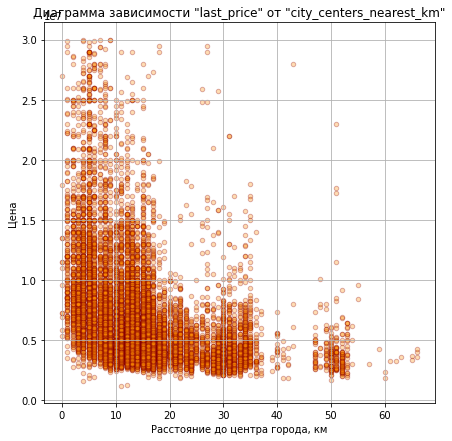

In [158]:
# Диаграмма рассеяния по полям "last_price" от "living_area"
# Размер графика: 15 на 7;
df[df['last_price'] < 30000000].plot(x='city_centers_nearest_km', 
                                     y='last_price', 
                                     kind='scatter',
                                     grid=True,
                                     figsize=(7, 7), 
                                     color='darkorange', 
                                     ec='darkred',
                                     alpha=0.3)

# Именуем оси и название, чтобы диаграмма была более понятна
plt.title('Диаграмма зависимости "last_price" от "city_centers_nearest_km"')
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Цена')

# Отображаем диаграмму на экране
plt.show()

Также, вычислим коэффициент корреляции:

In [159]:
df[['last_price', 'city_centers_nearest_km']].corr()

,last_price,city_centers_nearest_km
last_price,1.000000,-0.225678
city_centers_nearest_km,-0.225678,1.000000


##### Вывод

***Из диаграммы и коэффициента корреляции можем сделать следующие выводы***:
- Имеется обратная зависимость цены от расстояния до центра города. То есть, чем больше расстояние, тем меньше цена;
- Тем не менее, влияние достаточно мало, коэффициент всего лишь "-0.22", а значит, влияние этой характеристики пусть и существует, но относительно слабое;
- Можно наблюдать достаточно резкий спад стоимости примерно начиная с 20 км до центра города. Это как раз приблизительный радиус от центра до окраины города. То есть, можно сказать, что есть достаточно чёткая граница между ценами, определяемая границами города. Также, очевидно, что на расстоянии 20км и более достаточно много населённых пунктов, где цена недвижимости ниже.

### Общий вывод

#### Выполненные действия

- Была изучена общая информация по предоставленному датасету:
    - Узнали структуру таблицы с названиями столбцов, типами данных и объёмом датасета;
    - Получили представление о наполнении датасета с помощью построенных гистограм по числовым характеристикам.
- Выполнена предобработка данных:
    - Переименованы столбцы для более чёткого понимания их назначения;
    - Привели первоначальный список столбцов, для которых требовалось или рекомендовалось изменить тип данных;
    - Определены столбцы с пропусками в даннных;
    - Проанализировали все столбцы на предмет некорректности пропусков и аномалий в данных
    - Исправили некорректные пропуски, устранили аномалии и где требовалось, изменили типы данных;
    - Во время предобработки частично провели анализ столбцов, что впоследствии пригодилось в исследовании.
- Добавили ряд новых столбцов в таблицу для их использования в исследовании:
    - ***price_square_meter*** - цена одного квадратного метра;
    - ***exposition_weekday*** - день недели публикации объявления;
    - ***exposition_month*** - месяц публикации объявления;
    - ***exposition_year*** - год публикации объявления;
    - ***floor_position*** - расположение этажа квартиры;
    - ***city_centers_nearest_km*** - расстояние до центра города, км;
    - ***locality_type*** - тип населённого пункта.
- Провели исследовательский анализ данных:
    - Сделали обзор характеристик объектов недвижимости с помощью построения гистограмм, что дало нам понимание того, как распределена каждая из рассматриваемых характеристик в разрезе количества объявлений по каждой (отчасти мы узнали это на этапе предобработки данных):
        - *Общая площадь*;
        - *Жилая площадь*;
        - *Площадь кухни*;
        - *Цена объекта*;
        - *Количество комнат*;
        - *Высота потолков*;
        - *Этаж квартиры*;
        - *Тип этажа квартиры*;
        - *Общее количество этажей в доме*;
        - *Расстояние до центра города, м*;
        - *Расстояние до ближайшего аэропорта*;
        - *Расстояние до ближайшего парка*;
        - *День недели публикации объявления*;
        - *Месяц публикации объявления*;
    - Выполнен анализ того, сколько времени уходит на продажу квартир. Был сделан вывод о том, что примерно половина квартир продаётся менее, чем за 100 дней. Процент открытых объявлений на протяжении 9 месяцев и более, составил менее 25% от общего числа объявлений;
    - Оценили влияние ряда характеристик на стоимость объекта и сделали вывод о том, что наиболее сильное влияние на стоимость квартиры имеет общая площадь:
        - **Влияние общей площади**;
        - Влияние жилой площади;
        - Влияние площади кухни;
        - Влияние количества комнат;
        - Влияние расположения этажа;
        - Влияние даты размещения (по дню недели, месяцу и году отдельно).
    - Посчитали среднюю цену квадратного метра среди десяти населённых пунктов с наибольшим количеством объявлений. Результат - **104654.71 рублей**. При расчёте мы выполнили фильтрацию по цене квартиры таким образом, чтобы учитывались только квартиры дешевле 30 миллионов рублей. В противном случае малое число крайне дорогих квартир сильно влияло на среднее значение, что сочти необъективным результатом.
    - Посчитали среднюю цену одного километра по характеристике расстояния до центра города, которая оказалась равна "**1 347 714 км**" за каждый километр ближе к городу. Результат крайне условный, посколько дальнейший анализ влияние расстояния до центра города показал, что эта зависимость выражена достаточно слабо. И будто бы, эта зависимость не прямая, а через разницу в ценах в других населённых пунктах.

#### Наблюдения и рекомендации по результатам исследования

В целом, датасет имел большое количество аномалий и пропусков, что потребовало достаточно много трудозатрат на их исправление для возможности корректного исследования. Это навело на мысли о том, что в различных местах системы Яндекс.Недвижимости есть проблемные места, которые можно было бы доработать:

##### Проблемы столбцов

- *Высота потолков*:
    - **Проблема**: У авторов объявлений есть возможность вводить любые значения высоты потолка. В датасете был рекордсмен с квартирой со 100-метровым потолком. Также, автор может оставить это значение пустым;
    - **Возможное решение**: Выводить предупреждение для пользователя, если тот пытается ввести высоту потолка, выходящую за пределы от 2,5 до 3,6 метров. Либо запретить "неадекватные" значения высот потолков. А также, определить, насколько обязательно для объявлений указание высоты потолков;
- *Количество этажей*:
    - **Проблема**: Также есть возможность установить любое, не соответствующее действительности значение количества этажей, а также, не заполнить это поле вовсе;
    - **Возможное решение**: в случае вторичного рынка реализовать возможность подключения к внешней системе с реестром домов в населённых пунктов, откуда будет автоматически подтягиваться корректная информация о количестве этажей;
- *Площадь помещений*:
    - **Проблема**: Совокупная площадь кухни и жилой площади может превышать общую площадь;
    - **Возможное решение**: - Реализовать проверку при создании объявления, которая при попытке ввести некорректные значения, будет уведомлять пользователя о необходимости ввести корректные значения площадей;
- *Тип "Апартаменты"*:
    - **Проблема**: поле имеет не булевый тип данных, а внутри содержатся значения "True", "False" и "NaN";
    - **Возможное решение**: обеспечить расчёт значения как "False", если пользователь не указал информацию в форме ввода;
- *Количество балконов*:
    - **Проблема**: в столбце имеются значения как "NaN", так и "0";
    - **Возможное решение**: обеспечить расчёт значения как "0", если пользователь не указал информацию в форме ввода;
- *Название населённого пункта*:
    - **Проблема**: множество неявных дублей (пос**ё**лок/пос**е**лок и т.п.);
    - **Возможное решение**: доработать словарь с населёнными пунктами, или если он отсутствует, то реализовать его и обеспечить выбор населённого пункта пользователем именно на основе существующего списка. Пользователь не должен иметь возможность ввести своё значение. Также, рекомендуется разделить тип поселения и его название на отдельные столбцы, как это было сделано в текущей работе;
- *Расстояния до аэропорта, водоёмов и парков (метры)*:
    - **Проблема**: Имеются значения "0", имеются пропуски для тех населённых пунктов, в которых есть объявления с рассчитанным расстоянием:
    - **Возможное решение**: проанализировать корректность работы картографической системы, рассчитывающей расстояния;
- *Расстояние до центра города*:
    - **Проблема**: расстояние для всех или части населённых пунктов рассчитывается не до собственного центра, а до центра Санкт-Петербурга;
    - **Возможное решение**: доработать систему расчёта расстояний, чтобы центром считался центр собственного населённого пункта, либо конкретизировать описание/переменовать столбец, если мы поняли его назначение неверно;
- *Цена квартиры*:
    - **Проблема**: Есть крайние значения цен. Минимальная - 12 190 рублей, максимальная - 420 миллионов рублей;
    - **Возможное решение**: проверять подобные случаи индивидуально на предмет ошибок/мошенничества/прочих сомнительных действий. Как минимум, объявление с ценой 12 190 рублей явно стоит внимания;
    
Также, было исправлено название ряда столбцов. Подробно причины и изменения описаны в п. 2.1.

##### Рекомендации по продвижению объявлений

После проведённого анализа мы имеем представление, какие квартиры и с какими характеристиками присутствуют на рынке. На основе этого можно сделать выводы о том, какие объявления могут быть наиболее предпочтительны для продвижения в виде рекламы и вывода на главную страницу Яндекс.Недвижимости. Опишем образ условного "идеального" объявления. Квартира в идеальном объявлении должна соответствовать следующим свойствам:

- Иметь цену от 3 до 7 миллионов рублей (или от 3 до 4,5 миллионов, более узкого, но популярного пикового диапозона), потому что:
    - на основании диаграммы из п. 4.2.1., это именно тот сегмент ценового диапозона, который продаётся наиболее быстро;
    - это самый обширный ценовой сегмент, и как видно в сочетании с предыдущим пунктом - востребованный сегмент.
- Этаж должен быть не первым и не последним, так как они наименее желательны для покупателей (ввиду более низких цен);
- Общая площадь квартиры должна входить в рамки от 30м<sup>2</sup> до 80м<sup>2</sup>, чтобы с наибольшей вероятностью попадать в стандартный для таких площадей ценовой диапозон. Либо выбирать более точечные диапозоны площадей, основываясь на пиках из п. "4.2.1.";
- Для вторичного рынка - квартира в 5-этажном доме как самый распространённый сегмент в части этажности домов;

В рамках данного исследования **не** рассматривалась зависимость скорости продажи квартир от всех характеристик (только от цены, где прямого влияния не было обнаружено). Вероятно, что если провести отдельное исследований по зависимости скорости продажи от этих и, возможно, не представленных здесь характеристик, то рекомендации по продвижению могут стать более эффективными.

![Гифка котика](https://s01.yapfiles.ru/files/2488085/20181210232157.gif)